
## Flash Flood Study Exploratory Data Analysis (EDA) using the NAM 15-03Z BUFRs

In [1]:
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import glob
import sklearn.ensemble as ens
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score as kappa
from sklearn import metrics
import pickle
warnings.filterwarnings('ignore')
from rfpimp import *

Populating the interactive namespace from numpy and matplotlib


/Users/nicholascarr/anaconda/envs/flood/lib/python2.7/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
def plot_heatmap(df, site_name):

    f, ax = plt.subplots(figsize=(16, 12))
    plt.title('Correlations between predictors for {}'.format(site_name),
              fontweight='bold', fontsize=16)
    corr = df.corr()
    ax = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.savefig('Heatmap{}'.format(site_name))


def importance_plot(predictors, feature_imp, site_name):
  
    labels = feature_imp.index.tolist()
    indices = np.argsort(feature_imp)[::-1]
    plt.figure(figsize=(22,10))
    plt.title("Feature importances for {}".format(site_name),
              fontweight='bold', fontsize=20)
    plt.bar(range(predictors.shape[1]), feature_imp[indices],
            color="r", align="center")
    plt.xticks(range(predictors.shape[1]), labels, fontweight='bold', fontsize=7.7)
    plt.xlim([-1, predictors.shape[1]])
    plt.savefig('Feature_Imp{}'.format(site_name))
    

def boxplot(df, feature_imp, site_name, n_features=6):
    if n_features %2 != 0:
        raise ValueError('Must be even number of features')
    df['Text_Result'] = np.nan
    df.loc[(df.Result == 0), 'Text_Result'] = 'No Flooding'
    df.loc[(df.Result == 1), 'Text_Result'] = 'Widespread Flooding'
    fix, axes = plt.subplots ((n_features / 2), 2, figsize=(16,16))
    plt.suptitle('Boxplot for {}'.format(site_name), fontweight='bold', fontsize=18)
    axs = axes.ravel()

    #Only plot 8 most important features
    for i, feature in enumerate(feature_imp.index[:n_features]):
        boxplot = sns.boxplot(x='Text_Result', y=feature, data=df, width=0.5, 
                              order= ['No Flooding', 'Widespread Flooding'], ax=axs[i])
        plt.savefig('boxplot{}'.format(site_name))

## Let's look at correlations and dependences among the predictors

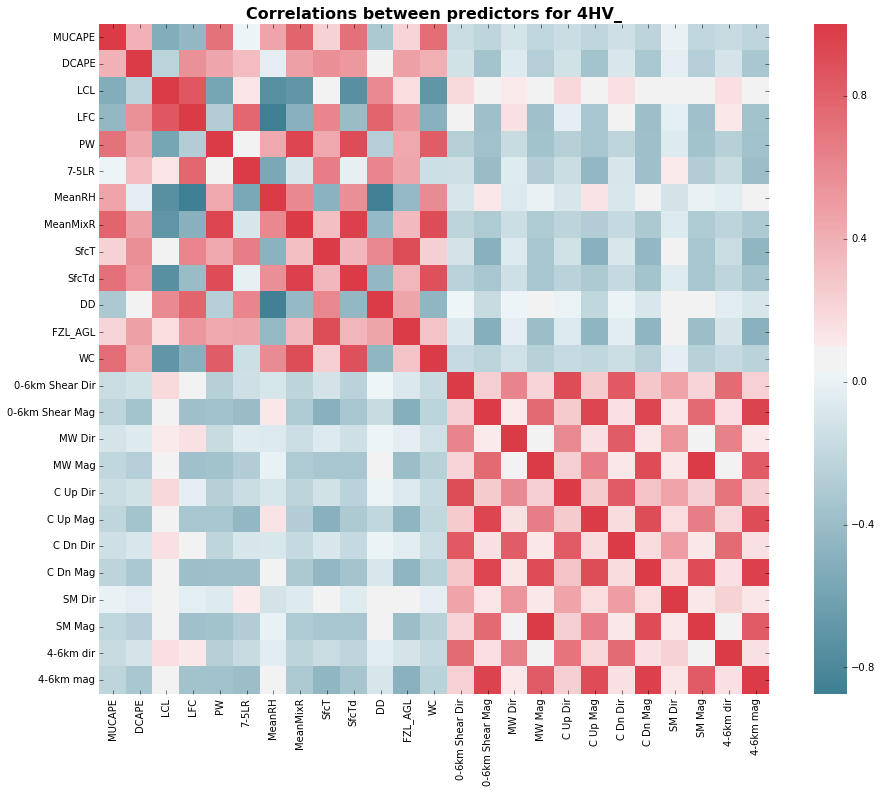

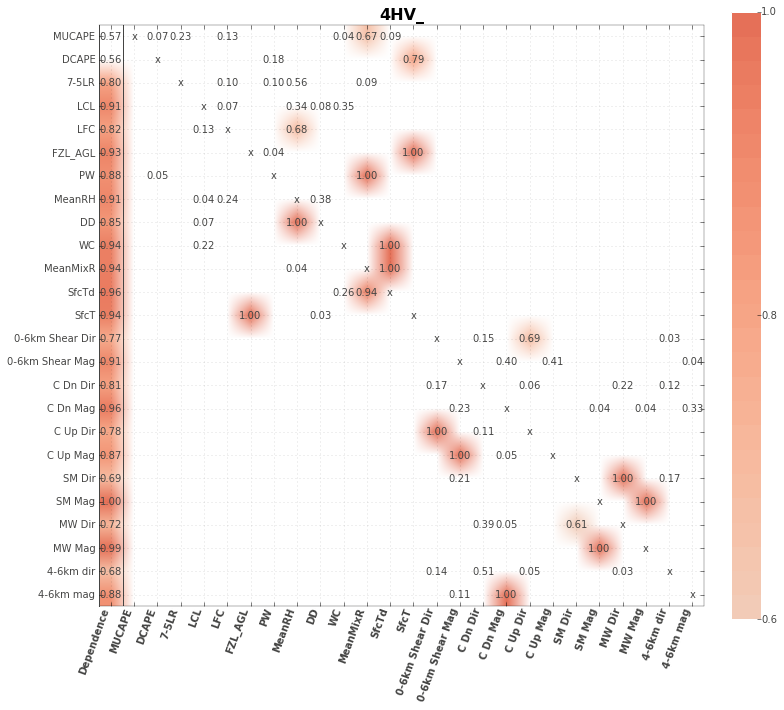

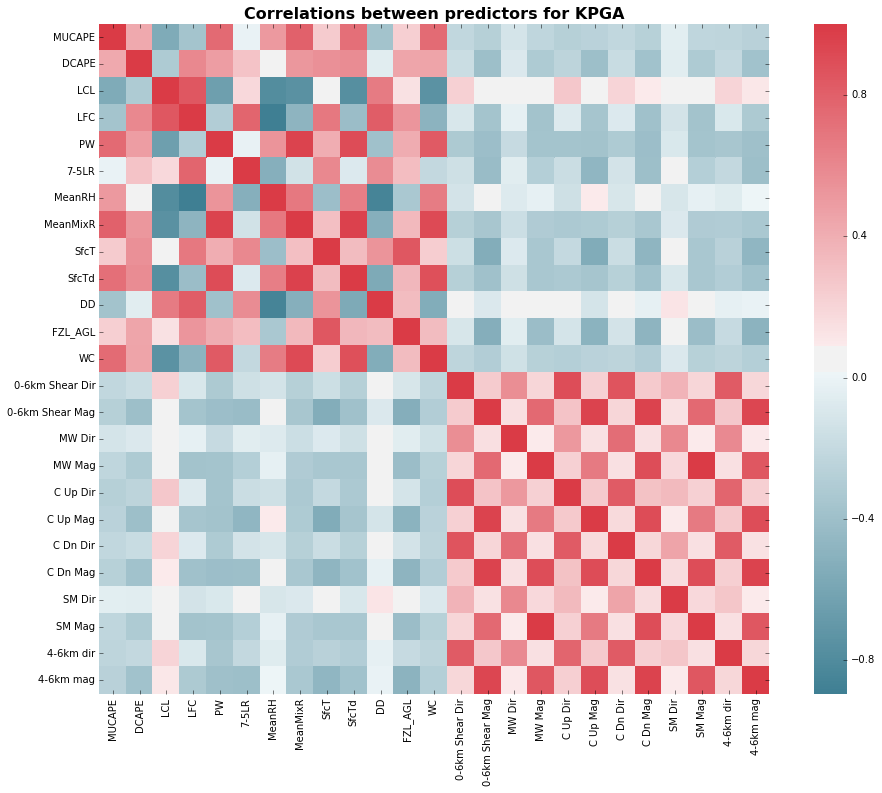

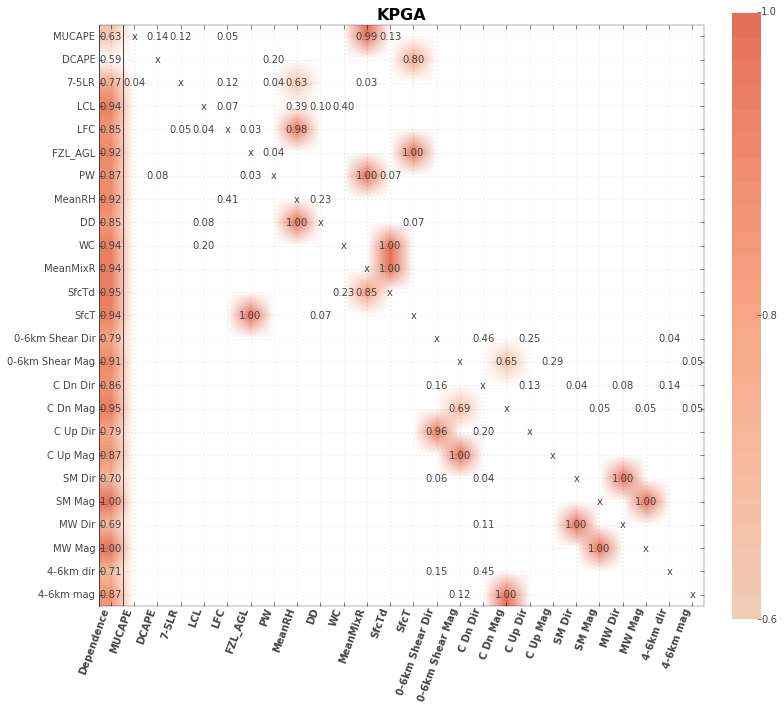

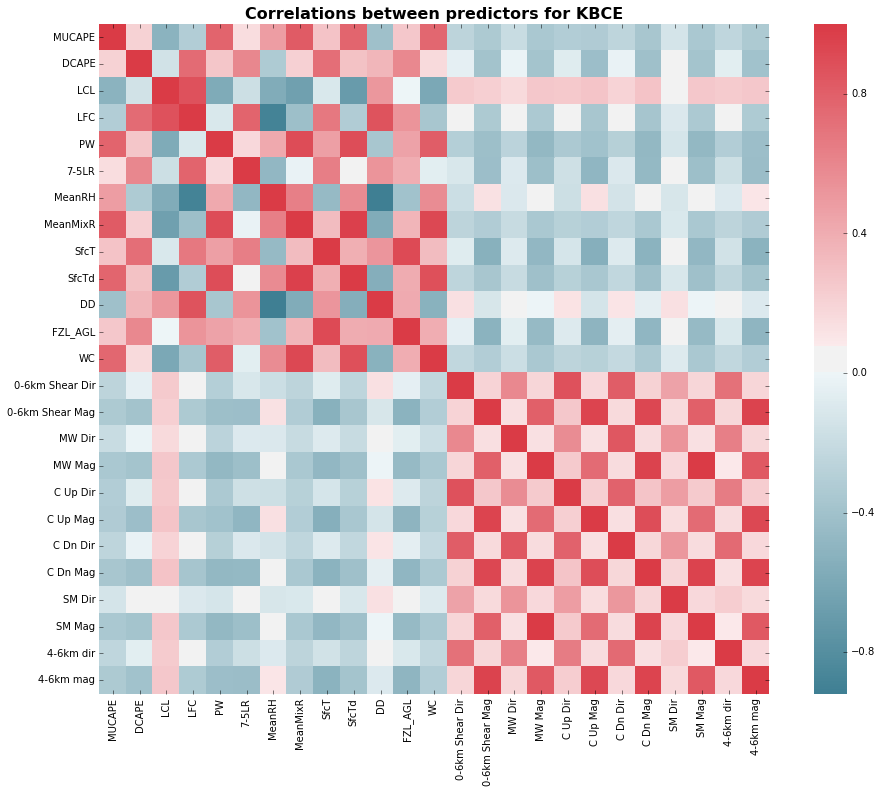

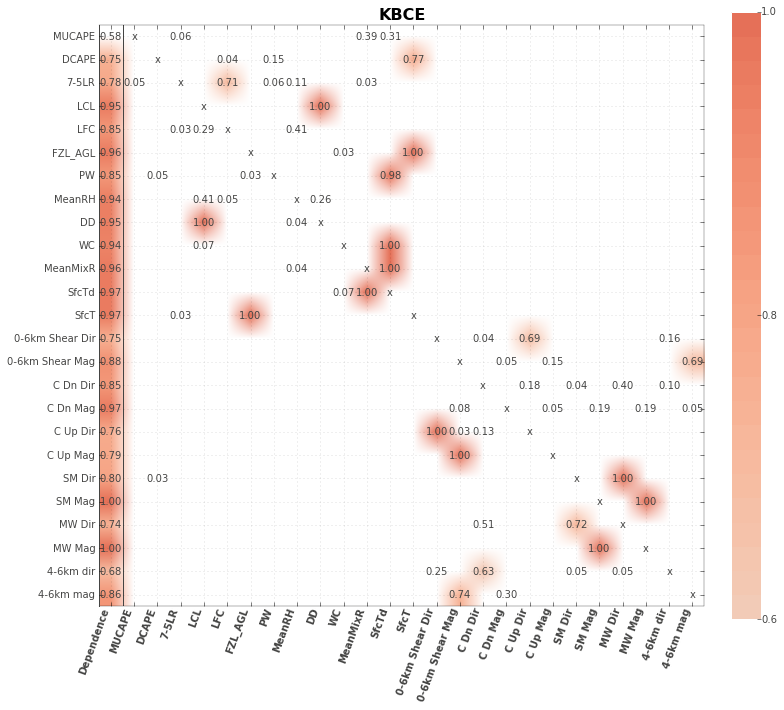

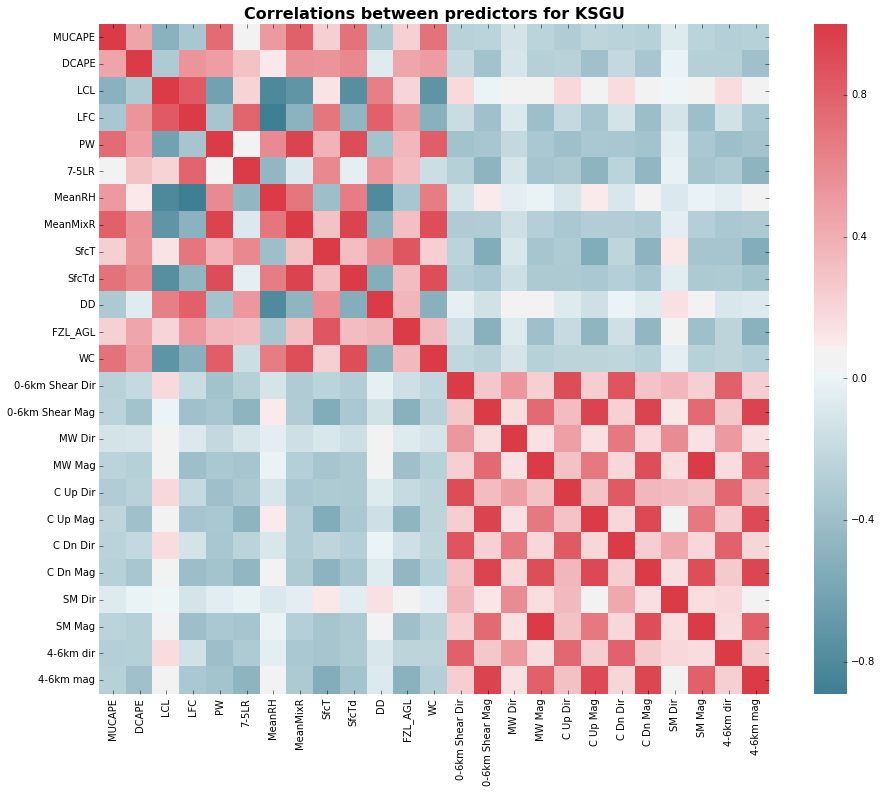

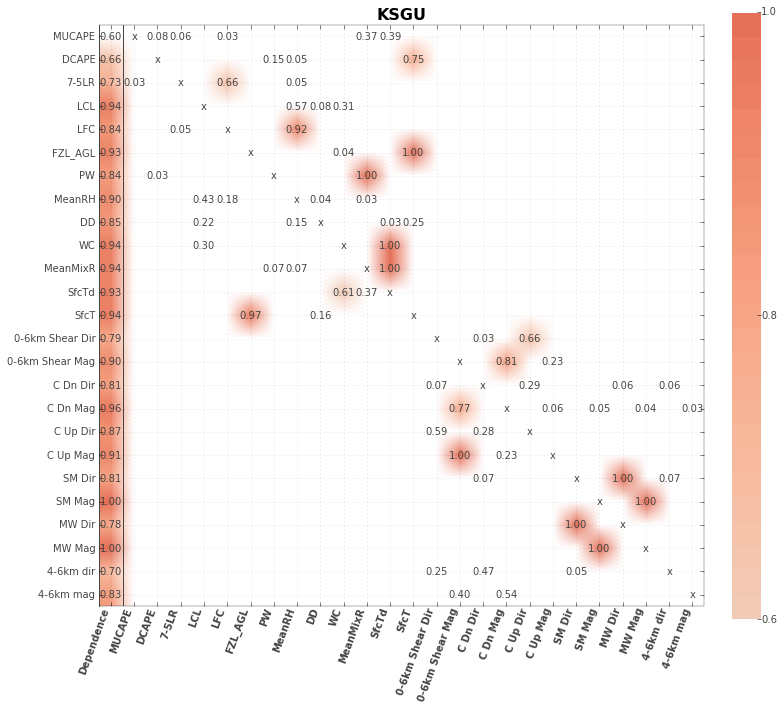

In [3]:
THERMO = ['MUCAPE', 'DCAPE', '7-5LR', 'LCL', 'LFC',
          'FZL_AGL','PW', 'MeanRH','DD', 'WC', 'MeanMixR', 'SfcTd', 'SfcT'] 

KIN = ['0-6km Shear Dir', '0-6km Shear Mag', 'C Dn Dir',
       'C Dn Mag', 'C Up Dir', 'C Up Mag', 'SM Dir','SM Mag',
       'MW Dir','MW Mag', '4-6km dir',
       '4-6km mag']

for csv in glob.glob('*nam.csv'):
    site_name = csv[:4]
    df = pd.read_csv(csv)
    [df.pop(x)for x in ['Basins', 'Year', 'Result', 'Month']] #These aren't predictors
    plot_heatmap(df, site_name)
    df.dropna(subset=THERMO + KIN, inplace=True)
    predictors = df[THERMO + KIN]
    D = feature_dependence_matrix(predictors)
    plot_dependence_heatmap(D, figsize=(11,10), value_fontsize=10, label_fontsize=10)
    plt.title('{}'.format(site_name), fontweight='bold', fontsize=16)
    plt.savefig('Feature_Dependence{}'.format(site_name))

## Using 2018 as the "test dataset"

('4HV_', "Accuracy = 0.96,  Brier Score 0.03, Out of bag error score 0.08, AUC = 0.92, Cohen's Kappa -0.02")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,164,3
Flooding Observed,3,0


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
76,0.49,0.51,0.0,Incorrect
77,0.41,0.59,0.0,Incorrect
79,0.77,0.23,1.0,Incorrect
89,0.61,0.39,1.0,Incorrect
107,0.58,0.42,1.0,Incorrect
148,0.47,0.53,0.0,Incorrect


---------------------------------------------

('KPGA', "Accuracy = 0.94,  Brier Score 0.05, Out of bag error score 0.09, AUC = 0.95, Cohen's Kappa 0.51")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,157,5
Flooding Observed,5,6


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
45,0.19,0.81,0.0,Incorrect
73,0.73,0.27,1.0,Incorrect
74,0.63,0.37,1.0,Incorrect
79,0.71,0.29,1.0,Incorrect
84,0.78,0.22,1.0,Incorrect
88,0.57,0.43,1.0,Incorrect
103,0.47,0.53,0.0,Incorrect
107,0.23,0.77,0.0,Incorrect
108,0.29,0.71,0.0,Incorrect
149,0.34,0.66,0.0,Incorrect


---------------------------------------------

('KBCE', "Accuracy = 0.88,  Brier Score 0.07, Out of bag error score 0.14, AUC = 0.93, Cohen's Kappa 0.40")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,136,14
Flooding Observed,5,8


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
64,0.36,0.64,0.0,Incorrect
66,0.35,0.65,0.0,Incorrect
70,0.56,0.44,1.0,Incorrect
71,0.51,0.49,1.0,Incorrect
72,0.71,0.29,1.0,Incorrect
74,0.39,0.61,0.0,Incorrect
75,0.45,0.55,0.0,Incorrect
76,0.39,0.61,0.0,Incorrect
77,0.42,0.58,0.0,Incorrect
79,0.56,0.44,1.0,Incorrect


---------------------------------------------

('KSGU', "Accuracy = 0.95,  Brier Score 0.04, Out of bag error score 0.08, AUC = 0.93, Cohen's Kappa 0.44")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,163,6
Flooding Observed,3,4


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
68,0.45,0.55,0.0,Incorrect
69,0.30,0.70,0.0,Incorrect
70,0.75,0.25,1.0,Incorrect
74,0.31,0.69,0.0,Incorrect
77,0.46,0.54,0.0,Incorrect
78,0.44,0.56,0.0,Incorrect
89,0.76,0.24,1.0,Incorrect
98,0.49,0.51,0.0,Incorrect
108,0.78,0.22,1.0,Incorrect


---------------------------------------------



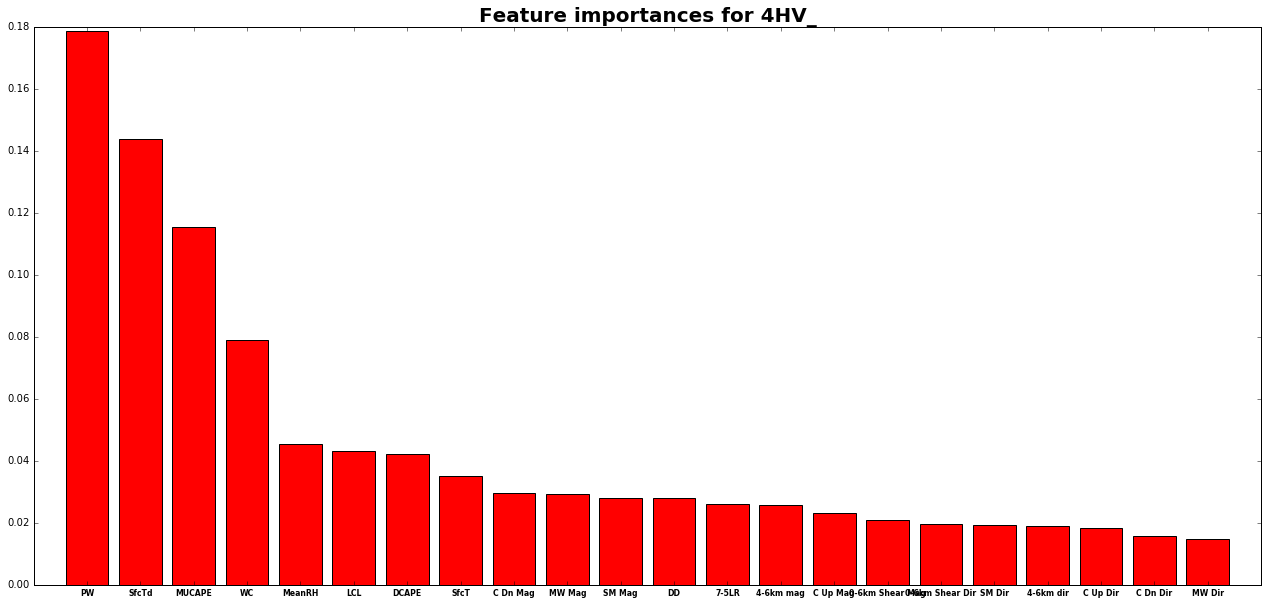

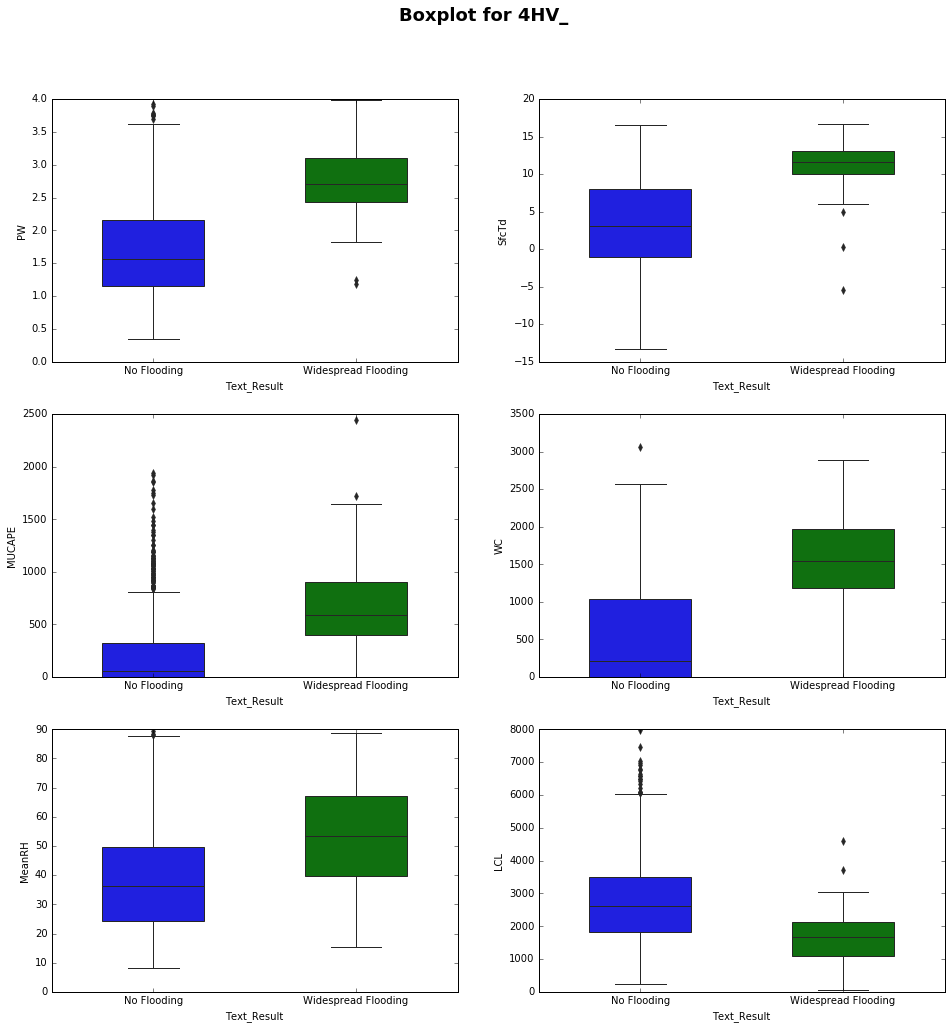

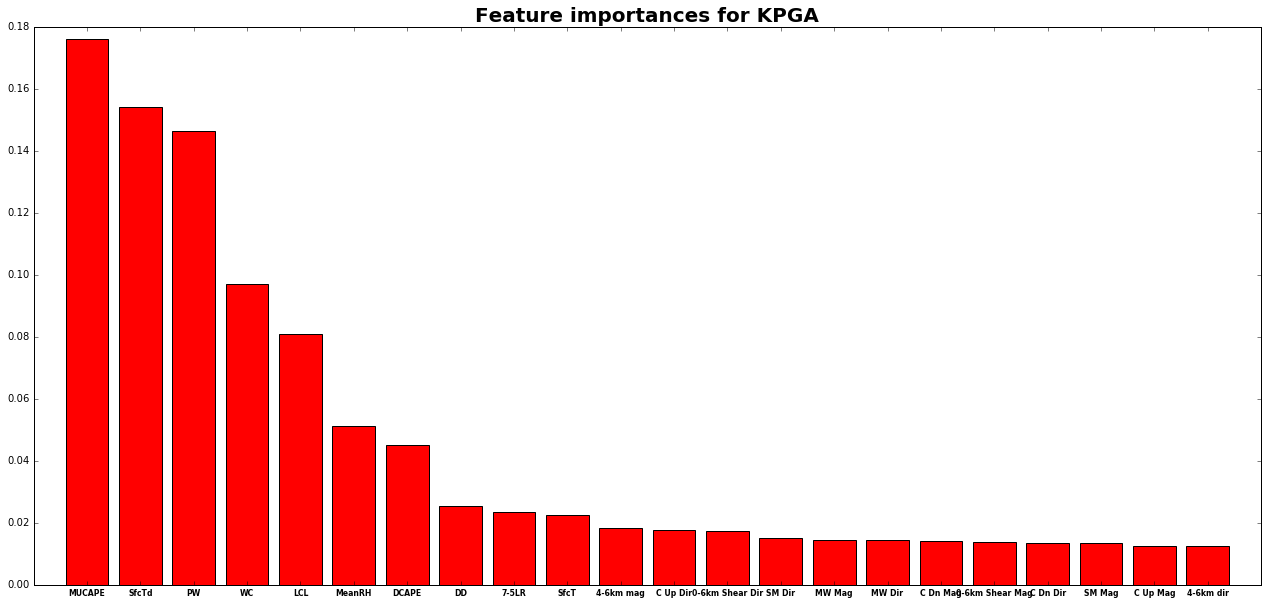

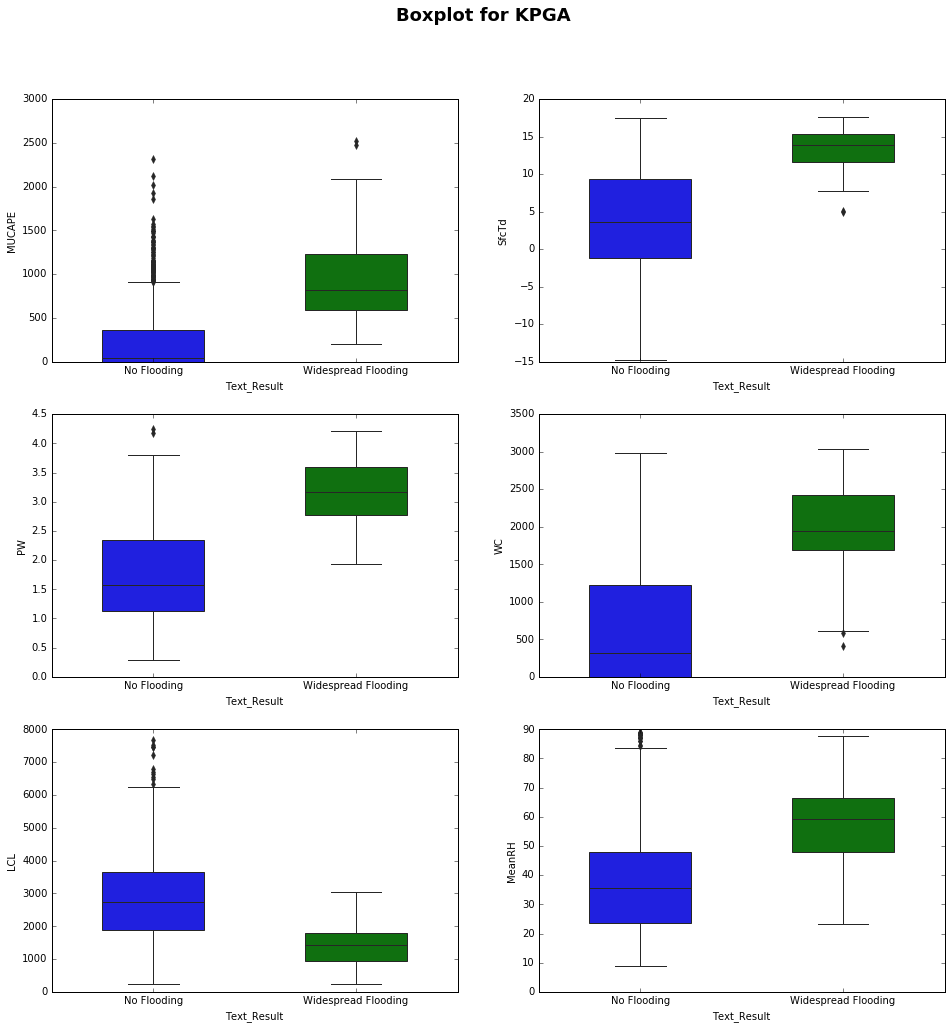

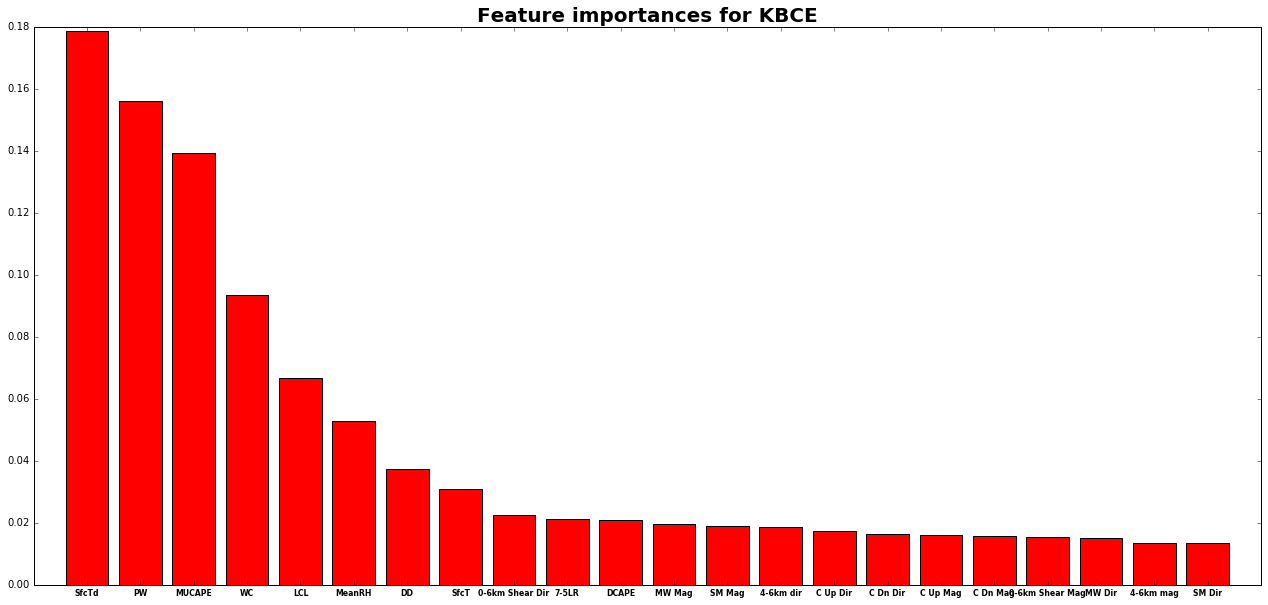

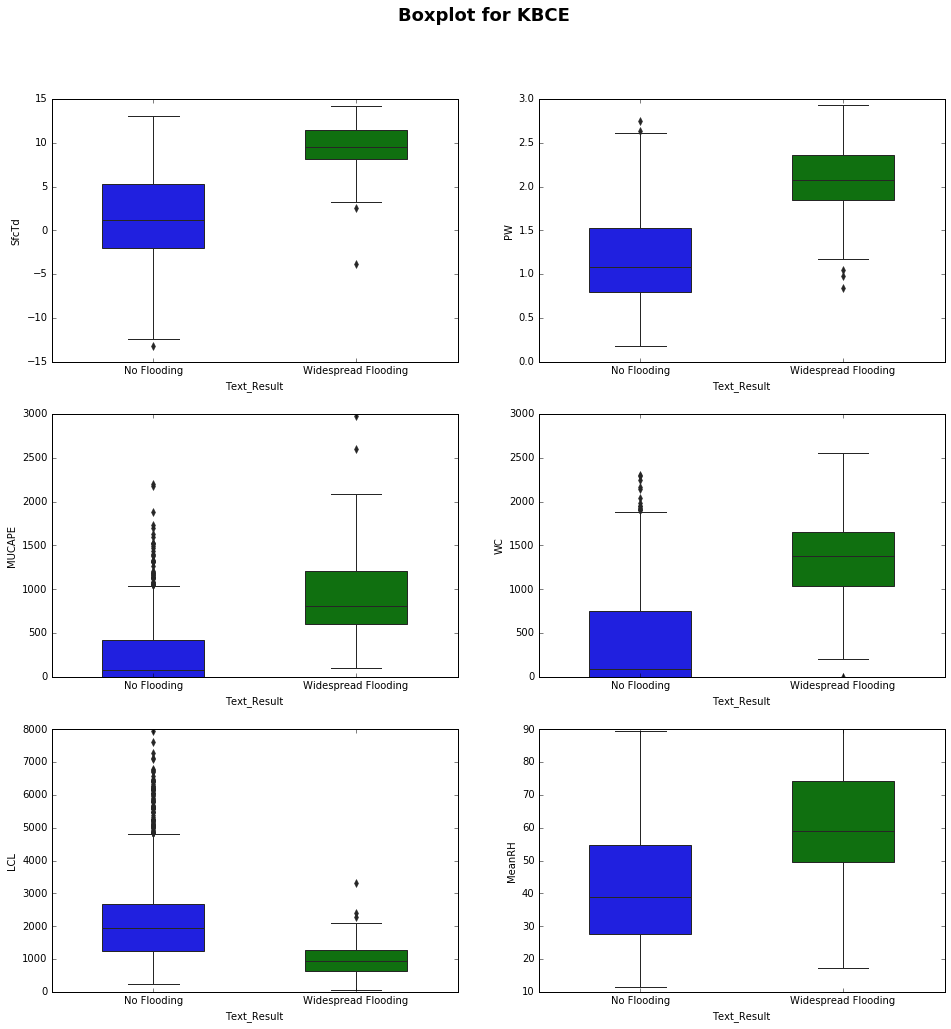

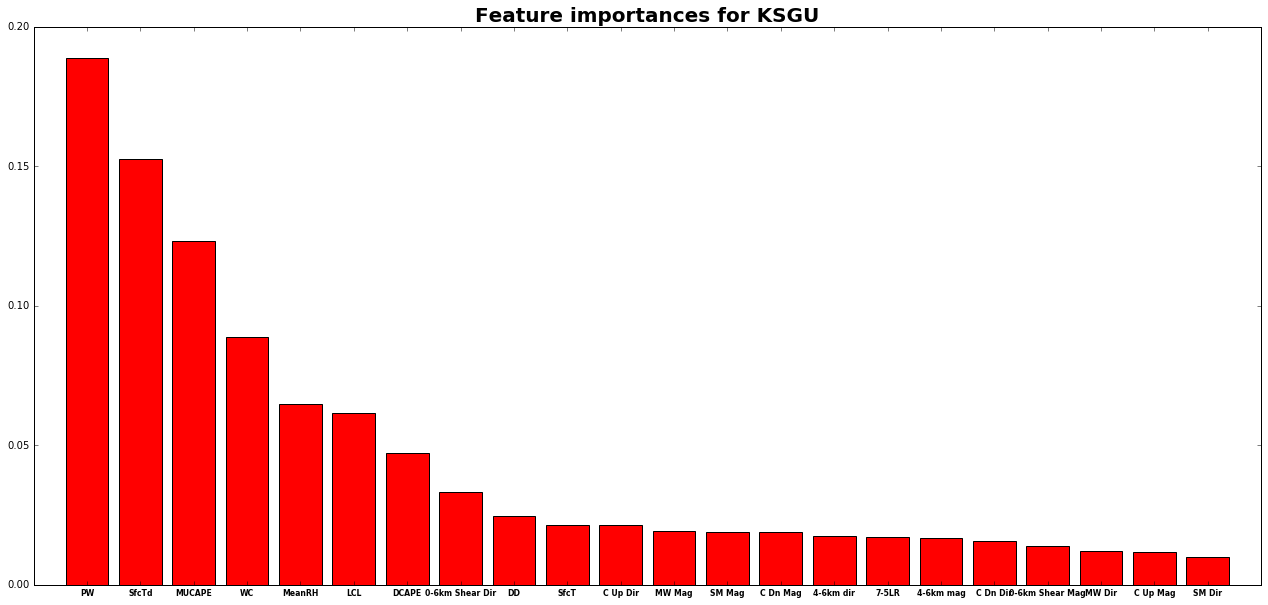

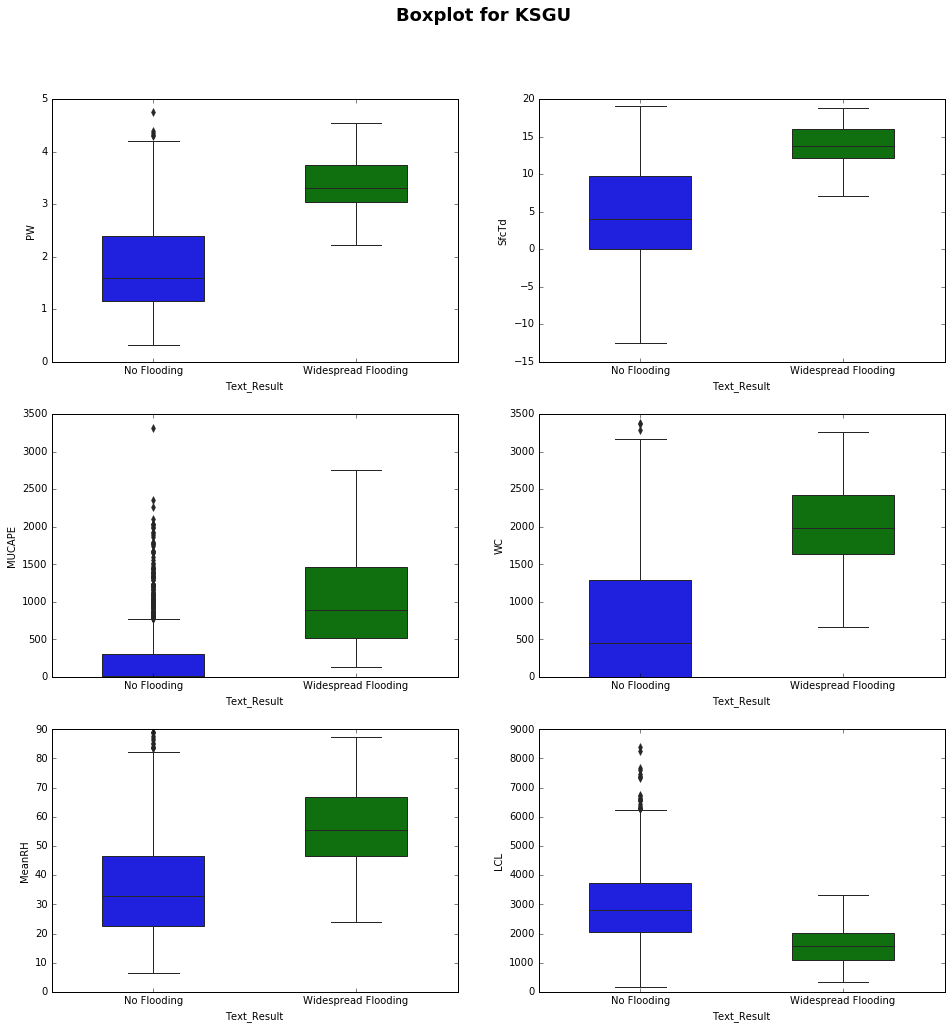

In [4]:
THERMO = ['MUCAPE', 'DCAPE', '7-5LR', 'LCL','PW', 'MeanRH','DD', 'WC', 'SfcTd', 'SfcT'] 

KIN = ['0-6km Shear Dir', '0-6km Shear Mag', 'C Dn Dir',
       'C Dn Mag', 'C Up Dir', 'C Up Mag', 'SM Dir','SM Mag',
       'MW Dir','MW Mag', '4-6km dir',
       '4-6km mag']

for csv in glob.glob('*nam.csv'):
    site_name = csv[:4]
    df = pd.read_csv(csv)
    if site_name == 'KBCE':
        df.loc[(df['Basins'] == 2), 'Result'] = 1
    if '4HV' or 'SGU' in site_name:
        df.loc[(df['Basins'] == 1), 'Result'] = 1
    df.dropna(subset=KIN + THERMO + ['Result'], inplace=True) 
  
    training_df = df[df['Year'] < 2018]
    test_df = df[df['Year'] == 2018]
    xtrain = training_df[THERMO + KIN]
    xtest = test_df[THERMO + KIN]
    ytrain = training_df.pop('Result')
    ytest = test_df.pop('Result')

    #xtest['random'] = np.random.random(size=len(xtest))
    #xtrain['random'] = np.random.random(size=len(xtrain))
    #Hyperparameters based on tuning
    clf = ens.RandomForestClassifier(n_estimators=2000, max_depth=15, min_samples_leaf=4,
                                     min_samples_split=4,oob_score=True,
                                     class_weight='balanced')
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)
    internal_score = 1 - clf.oob_score_
    yprob = clf.predict_proba(xtest)[0:, 1]
    brier_score = metrics.brier_score_loss(ytest, yprob)
    auc = metrics.roc_auc_score(ytest, yprob)
    feature_imp = pd.Series(clf.feature_importances_,
                            index=xtest.columns).sort_values(ascending=False)
    #feature_imp = permutation_importances(clf, xtrain, ytrain, oob_classifier_accuracy)
    cm = metrics.confusion_matrix(ytest, y_pred)
    index_names = ['No Flooding Observed', 'Flooding Observed']
    col_names = ['No Flooding Forecast', 'Flooding Forecast']
    cm_df = pd.DataFrame(cm, columns =col_names, index=index_names)
    ck = kappa(ytest, y_pred)
    print (site_name, 'Accuracy = {:3.2f}, '.format(accuracy) + 
           ' Brier Score {:3.2f}, '.format(brier_score) + 
           'Out of bag error score {:3.2f}, '.format(internal_score) +
           'AUC = {:3.2f}, '.format(auc) +  
           'Cohen\'s Kappa {:3.2f}'.format(ck))
    display(cm_df.head())
    importance_plot(xtest, feature_imp, site_name)
    boxplot(df, feature_imp, site_name)
    print '-' * 45 + '\n'
    flood = np.round(clf.predict_proba(xtest[:]), 2) 
    prob_df = pd.DataFrame(flood, columns=['Prob_No_Flood', 'Prob_Flood'])
    result_df = ytest.reset_index()
    prob_df['Flood?'] = result_df['Result']
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) & 
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] == 0.5), 'Model_Prediction'] = 'Tie'
    
    print 'These are the probablities for the predictions the model got incorrect'
    display(prob_df[prob_df['Model_Prediction'] == 'Incorrect'])
    print '-' * 45 + '\n'

## Using the typical test/train split from the whole dataset

('4HV_', "Accuracy = 0.93,  Brier Score 0.06, Out of bag error score 0.08, AUC = 0.83, Cohen's Kappa 0.16")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,348,8
Flooding Observed,17,3


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
7,0.40,0.60,0.0,Incorrect
9,0.70,0.30,1.0,Incorrect
20,0.74,0.26,1.0,Incorrect
47,0.44,0.56,0.0,Incorrect
57,0.61,0.39,1.0,Incorrect
68,0.96,0.04,1.0,Incorrect
113,0.83,0.17,1.0,Incorrect
132,0.77,0.23,1.0,Incorrect
165,0.73,0.27,1.0,Incorrect
183,0.56,0.44,1.0,Incorrect


---------------------------------------------

('KPGA', "Accuracy = 0.93,  Brier Score 0.05, Out of bag error score 0.09, AUC = 0.94, Cohen's Kappa 0.51")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,337,11
Flooding Observed,15,16


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
7,0.47,0.53,0.0,Incorrect
34,0.21,0.79,0.0,Incorrect
46,0.87,0.13,1.0,Incorrect
47,0.55,0.45,1.0,Incorrect
72,0.58,0.42,1.0,Incorrect
77,0.42,0.58,0.0,Incorrect
120,0.41,0.59,0.0,Incorrect
121,0.62,0.38,1.0,Incorrect
125,0.39,0.61,0.0,Incorrect
131,0.84,0.16,1.0,Incorrect


---------------------------------------------

('KBCE', "Accuracy = 0.86,  Brier Score 0.08, Out of bag error score 0.12, AUC = 0.90, Cohen's Kappa 0.50")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,278,34
Flooding Observed,15,34


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
5,0.48,0.52,0.0,Incorrect
18,0.45,0.55,0.0,Incorrect
38,0.84,0.16,1.0,Incorrect
53,0.64,0.36,1.0,Incorrect
59,0.29,0.71,0.0,Incorrect
64,0.45,0.55,0.0,Incorrect
79,0.59,0.41,1.0,Incorrect
85,0.44,0.56,0.0,Incorrect
93,0.59,0.41,1.0,Incorrect
114,0.36,0.64,0.0,Incorrect


---------------------------------------------

('KSGU', "Accuracy = 0.91,  Brier Score 0.06, Out of bag error score 0.07, AUC = 0.90, Cohen's Kappa 0.29")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,336,23
Flooding Observed,12,9


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
1,0.89,0.11,1.0,Incorrect
3,0.33,0.67,0.0,Incorrect
17,0.97,0.03,1.0,Incorrect
19,0.35,0.65,0.0,Incorrect
31,0.40,0.60,0.0,Incorrect
53,0.35,0.65,0.0,Incorrect
55,0.52,0.48,1.0,Incorrect
59,0.45,0.55,0.0,Incorrect
60,0.51,0.49,1.0,Incorrect
63,0.84,0.16,1.0,Incorrect


---------------------------------------------



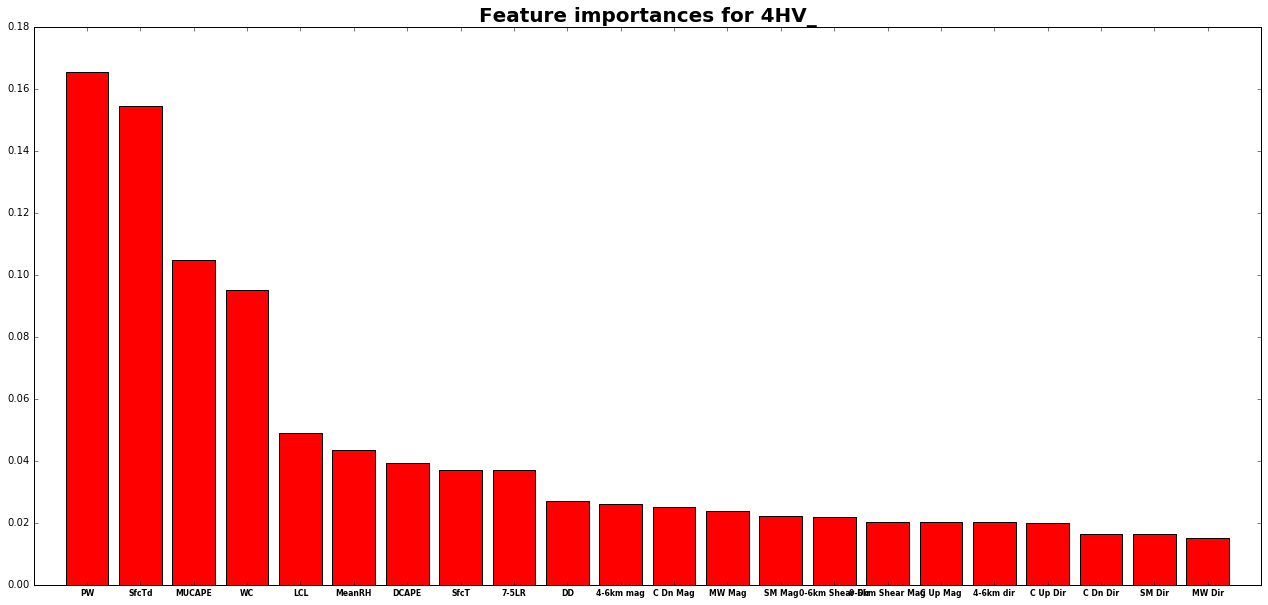

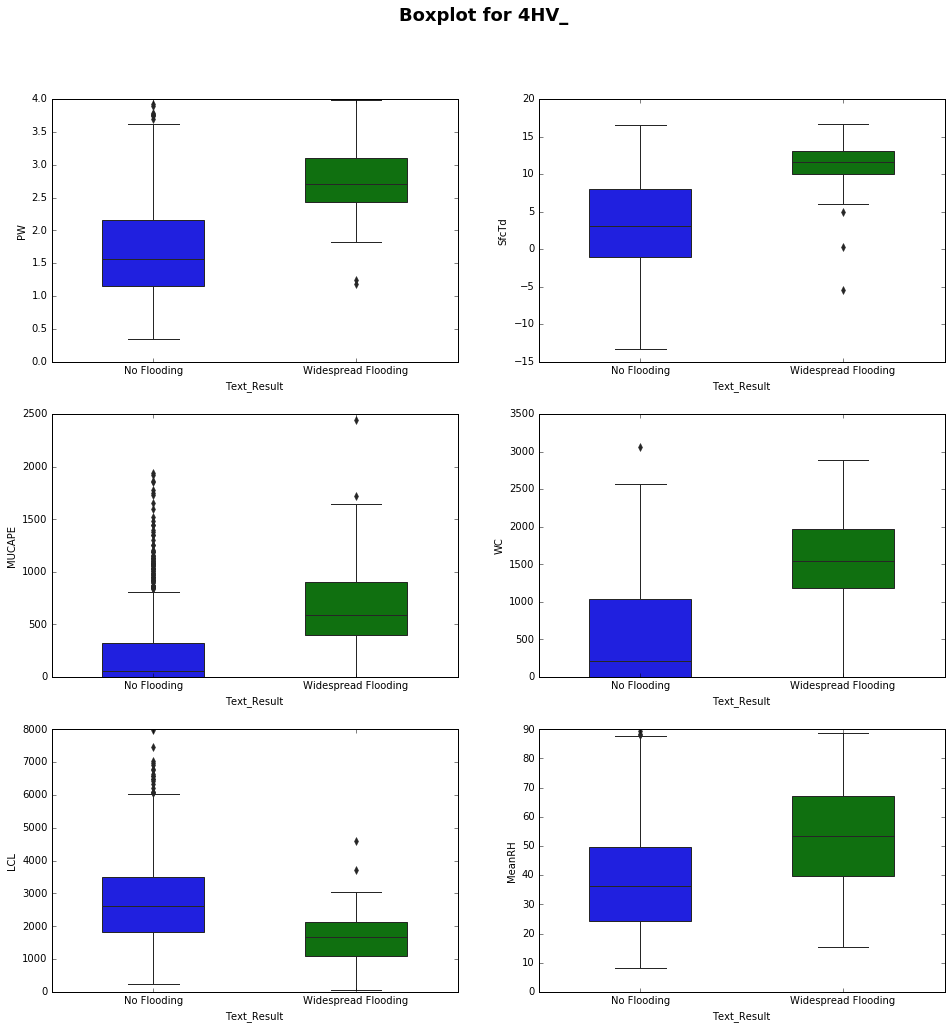

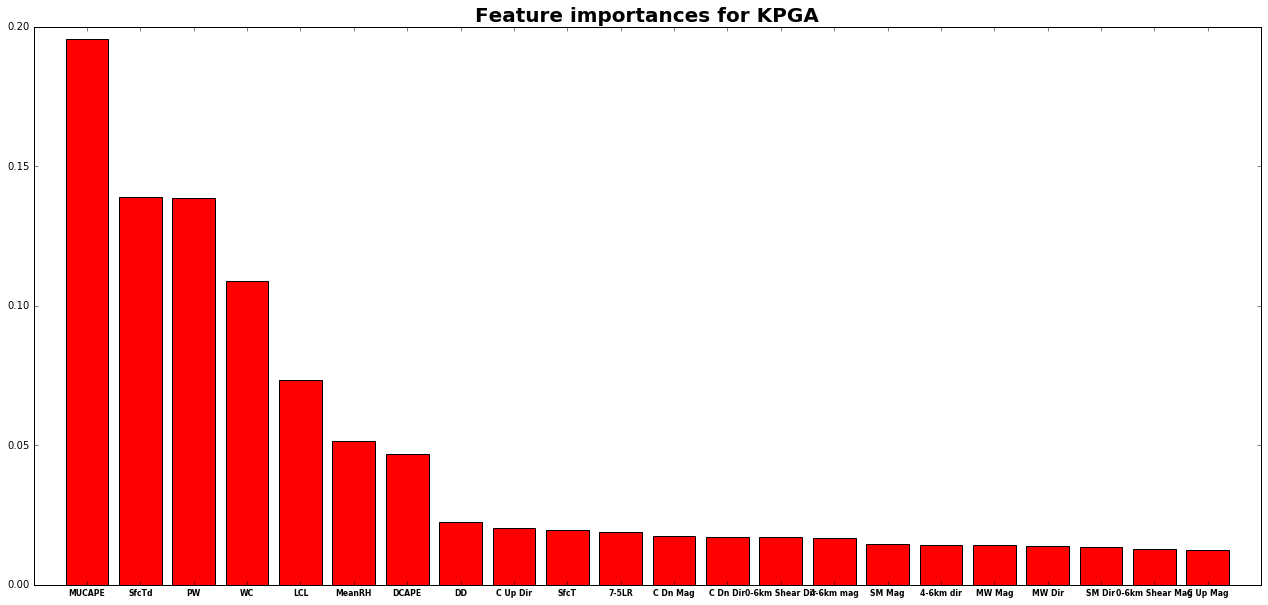

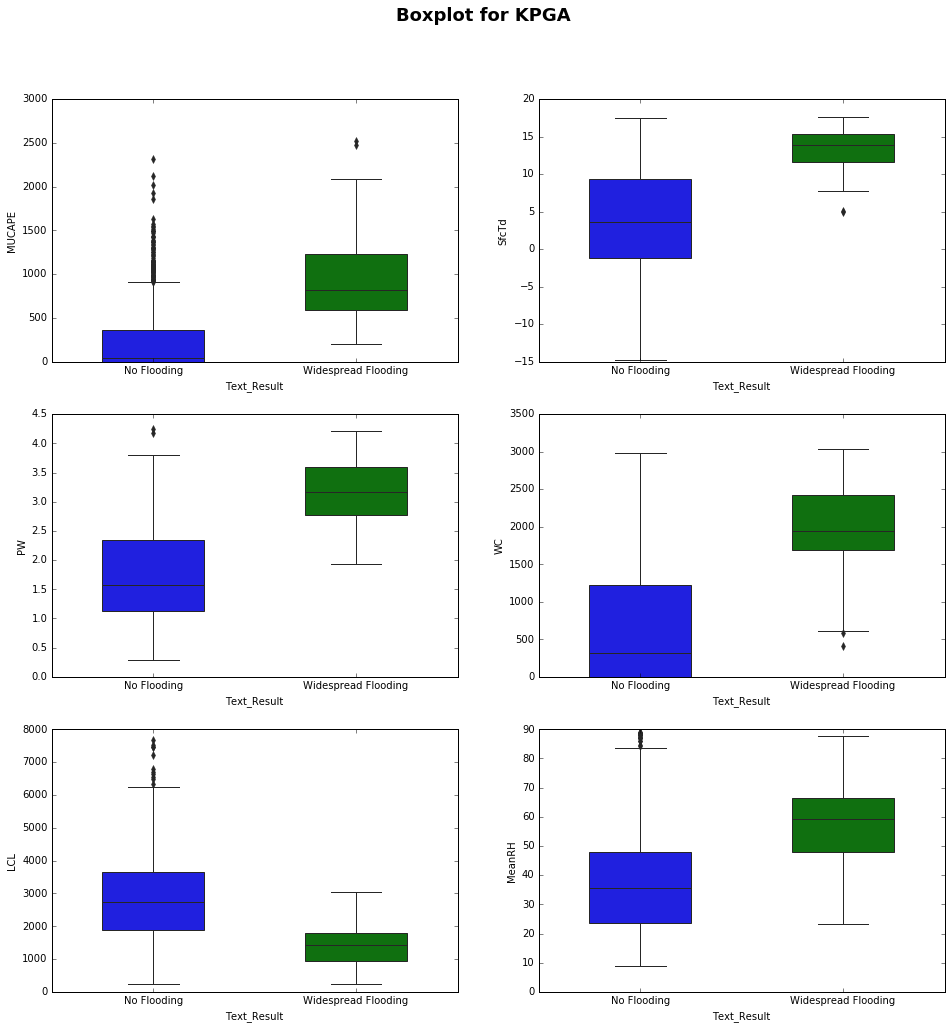

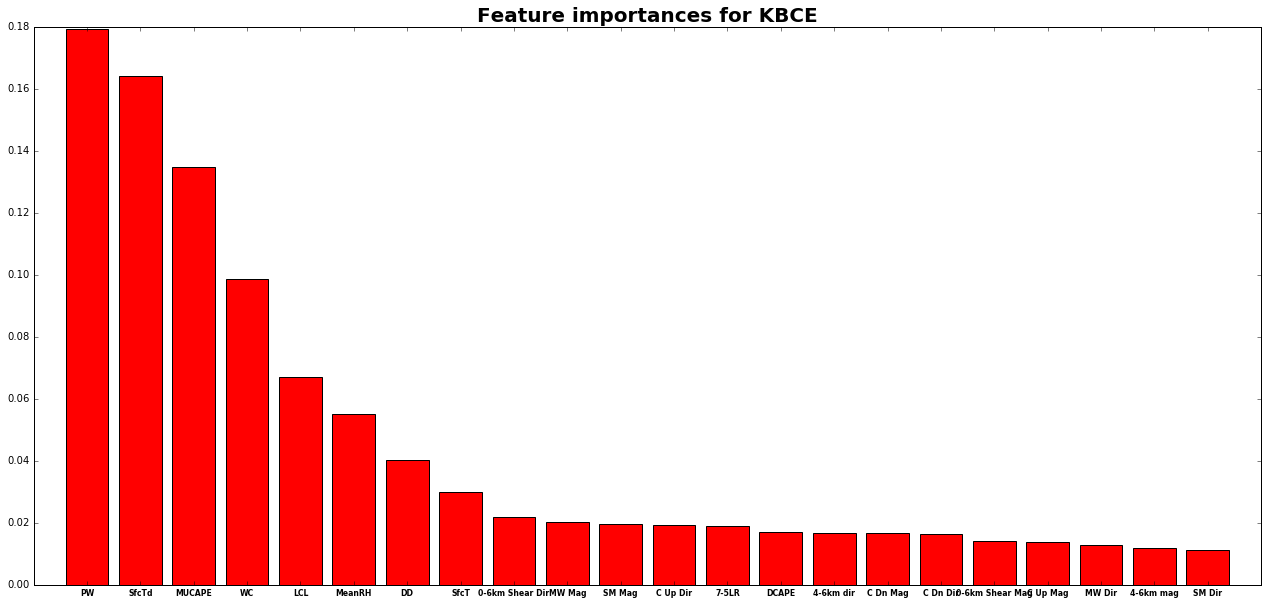

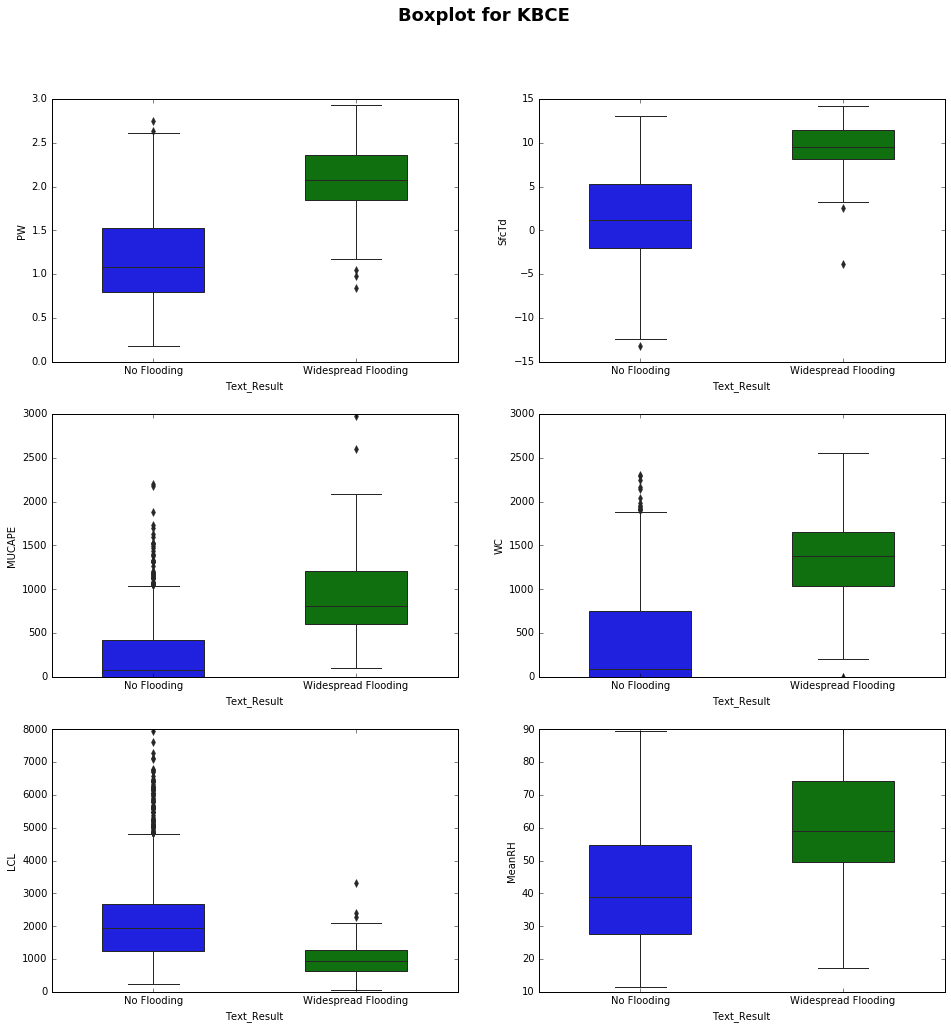

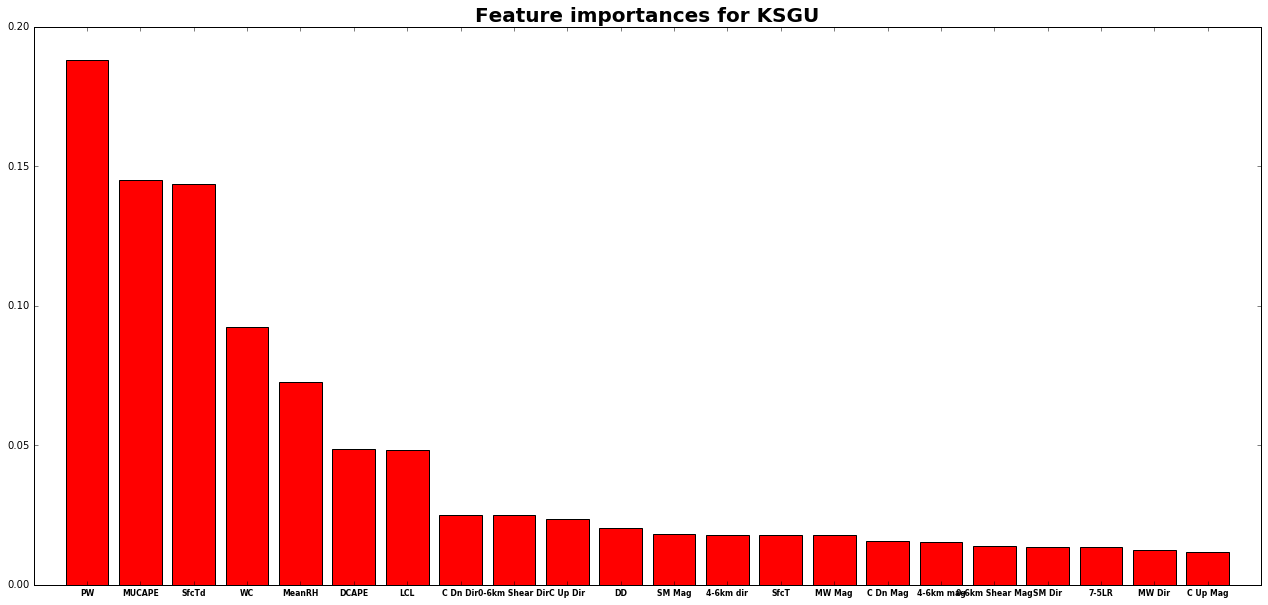

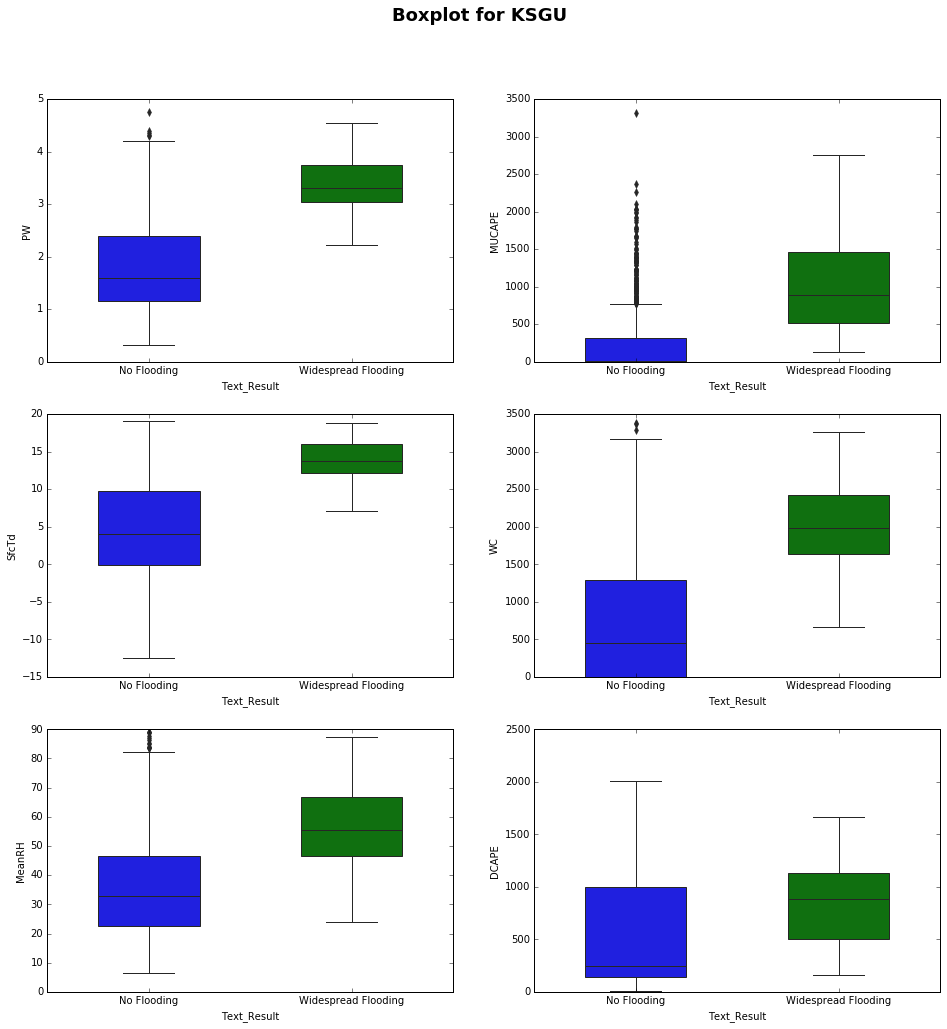

In [5]:
THERMO = ['MUCAPE', 'DCAPE', '7-5LR', 'LCL','PW', 'MeanRH','DD', 'WC', 'SfcTd', 'SfcT'] 

KIN = ['0-6km Shear Dir', '0-6km Shear Mag', 'C Dn Dir',
       'C Dn Mag', 'C Up Dir', 'C Up Mag', 'SM Dir','SM Mag',
       'MW Dir','MW Mag', '4-6km dir',
       '4-6km mag']

for csv in glob.glob('*nam.csv'):
    site_name = csv[:4]
    df = pd.read_csv(csv)
    if site_name == 'KBCE': # 3 Basins too stringent
        df.loc[(df['Basins'] == 2), 'Result'] = 1
    if '4HV' or 'SGU' in site_name: #Just not enough days with 2 Basins
        df.loc[(df['Basins'] == 1), 'Result'] = 1
    df.dropna(subset=KIN + THERMO + ['Result'], inplace=True) 
    predictors = df[THERMO + KIN]

    result = df['Result']
    
    xtrain, xtest, ytrain, ytest = train_test_split(predictors, 
                                                    result, 
                                                    test_size= 0.30) 
    #xtest['random'] = np.random.random(size=len(xtest))
    #xtrain['random'] = np.random.random(size=len(xtrain))
    #Hyperparameters based on tuning
    clf = ens.RandomForestClassifier(n_estimators=2000, max_depth=15, min_samples_leaf=4,
                                     min_samples_split=4,oob_score=True,
                                     class_weight='balanced')
    clf.fit(xtrain, ytrain)
    filename='NAM_model{}'.format(site_name)

    pickle.dump(clf, open(filename, 'wb'))

    y_pred = clf.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)
    internal_score = 1 - clf.oob_score_
    yprob = clf.predict_proba(xtest)[0:, 1]
    brier_score = metrics.brier_score_loss(ytest, yprob)
    auc = metrics.roc_auc_score(ytest, yprob)
    feature_imp = pd.Series(clf.feature_importances_,
                            index=xtest.columns).sort_values(ascending=False)
    #feature_imp = permutation_importances(clf, xtrain, ytrain, oob_classifier_accuracy)
    cm = metrics.confusion_matrix(ytest, y_pred)
    index_names = ['No Flooding Observed', 'Flooding Observed']
    col_names = ['No Flooding Forecast', 'Flooding Forecast']
    cm_df = pd.DataFrame(cm, columns =col_names, index=index_names)
    ck = kappa(ytest, y_pred)
    print (site_name, 'Accuracy = {:3.2f}, '.format(accuracy) + 
           ' Brier Score {:3.2f}, '.format(brier_score) + 
           'Out of bag error score {:3.2f}, '.format(internal_score) +
           'AUC = {:3.2f}, '.format(auc) +  
           'Cohen\'s Kappa {:3.2f}'.format(ck))
    display(cm_df.head())
    importance_plot(xtest, feature_imp, site_name)
    boxplot(df, feature_imp, site_name)
    print '-' * 45 + '\n'
    flood = np.round(clf.predict_proba(xtest[:]), 2) 
    prob_df = pd.DataFrame(flood, columns=['Prob_No_Flood', 'Prob_Flood'])
    result_df = ytest.reset_index()
    prob_df['Flood?'] = result_df['Result']
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) & 
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] == 0.5), 'Model_Prediction'] = 'Tie'
    
    print 'These are the probablities for the predictions the model got incorrect'
    display(prob_df[prob_df['Model_Prediction'] == 'Incorrect'])
    print '-' * 45 + '\n'

### The NAM underwent some changes in 2014 is it better to only use that dataset?

('4HV_', "Accuracy = 0.93,  Brier Score 0.05, Out of bag error score 0.08, AUC = 0.86, Cohen's Kappa 0.19")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,345,13
Flooding Observed,14,4


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
0,0.68,0.32,1.0,Incorrect
11,0.42,0.58,0.0,Incorrect
50,0.60,0.40,1.0,Incorrect
63,0.44,0.56,0.0,Incorrect
76,0.54,0.46,1.0,Incorrect
93,0.95,0.05,1.0,Incorrect
103,0.43,0.57,0.0,Incorrect
121,0.52,0.48,1.0,Incorrect
130,0.90,0.10,1.0,Incorrect
141,0.46,0.54,0.0,Incorrect


---------------------------------------------

('KPGA', "Accuracy = 0.92,  Brier Score 0.06, Out of bag error score 0.07, AUC = 0.93, Cohen's Kappa 0.34")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,337,8
Flooding Observed,24,10


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
12,0.67,0.33,1.0,Incorrect
62,0.68,0.32,1.0,Incorrect
63,0.71,0.29,1.0,Incorrect
71,0.39,0.61,0.0,Incorrect
82,0.81,0.19,1.0,Incorrect
100,0.62,0.38,1.0,Incorrect
102,0.71,0.29,1.0,Incorrect
115,0.72,0.28,1.0,Incorrect
121,0.48,0.52,0.0,Incorrect
125,0.64,0.36,1.0,Incorrect


---------------------------------------------

('KBCE', "Accuracy = 0.86,  Brier Score 0.09, Out of bag error score 0.13, AUC = 0.90, Cohen's Kappa 0.49")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,276,29
Flooding Observed,22,34


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
0,0.94,0.06,1.0,Incorrect
5,0.77,0.23,1.0,Incorrect
27,0.56,0.44,1.0,Incorrect
44,0.48,0.52,0.0,Incorrect
48,0.53,0.47,1.0,Incorrect
51,0.31,0.69,0.0,Incorrect
52,0.43,0.57,0.0,Incorrect
57,0.74,0.26,1.0,Incorrect
58,0.95,0.05,1.0,Incorrect
59,0.30,0.70,0.0,Incorrect


---------------------------------------------

('KSGU', "Accuracy = 0.93,  Brier Score 0.05, Out of bag error score 0.06, AUC = 0.91, Cohen's Kappa 0.25")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,350,9
Flooding Observed,16,5


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
25,0.43,0.57,0.0,Incorrect
69,0.45,0.55,0.0,Incorrect
74,0.49,0.51,0.0,Incorrect
106,0.70,0.30,1.0,Incorrect
122,0.71,0.29,1.0,Incorrect
130,0.66,0.34,1.0,Incorrect
144,0.20,0.80,0.0,Incorrect
164,0.76,0.24,1.0,Incorrect
166,0.94,0.06,1.0,Incorrect
180,0.51,0.49,1.0,Incorrect


---------------------------------------------



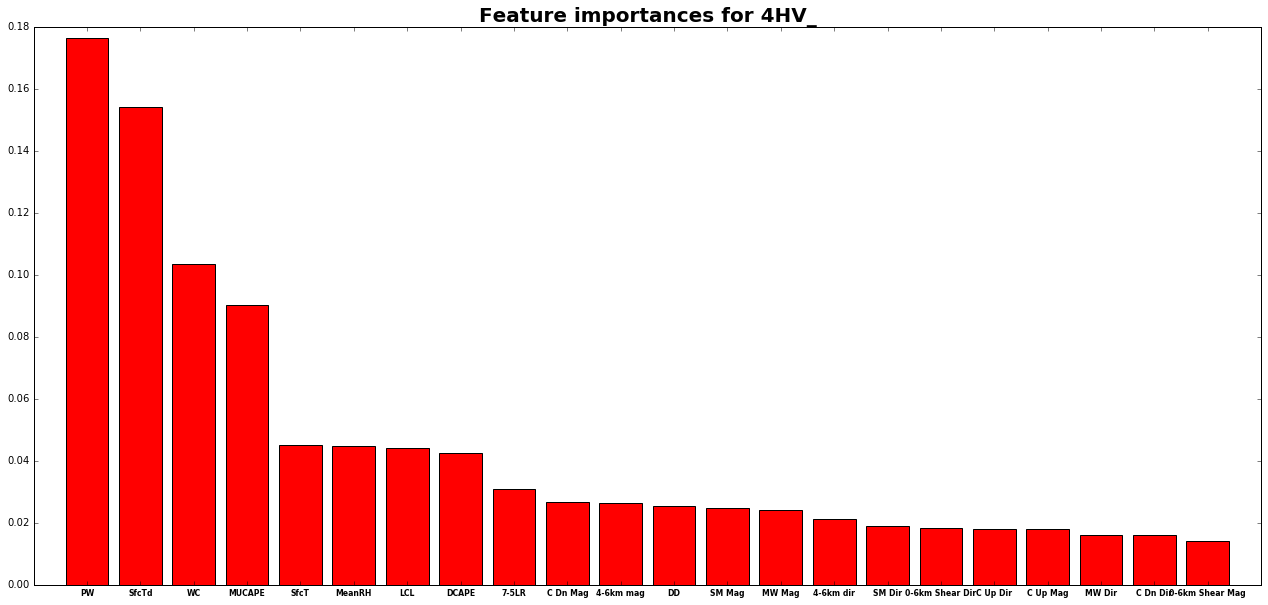

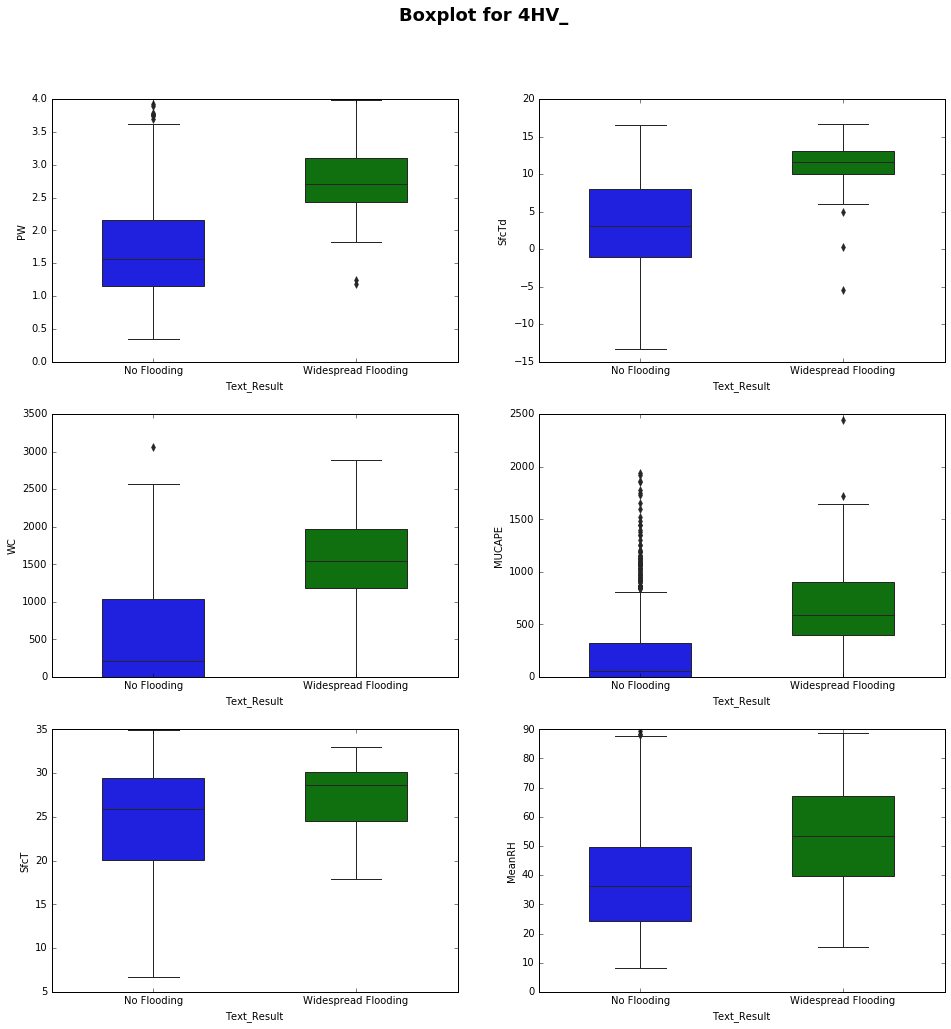

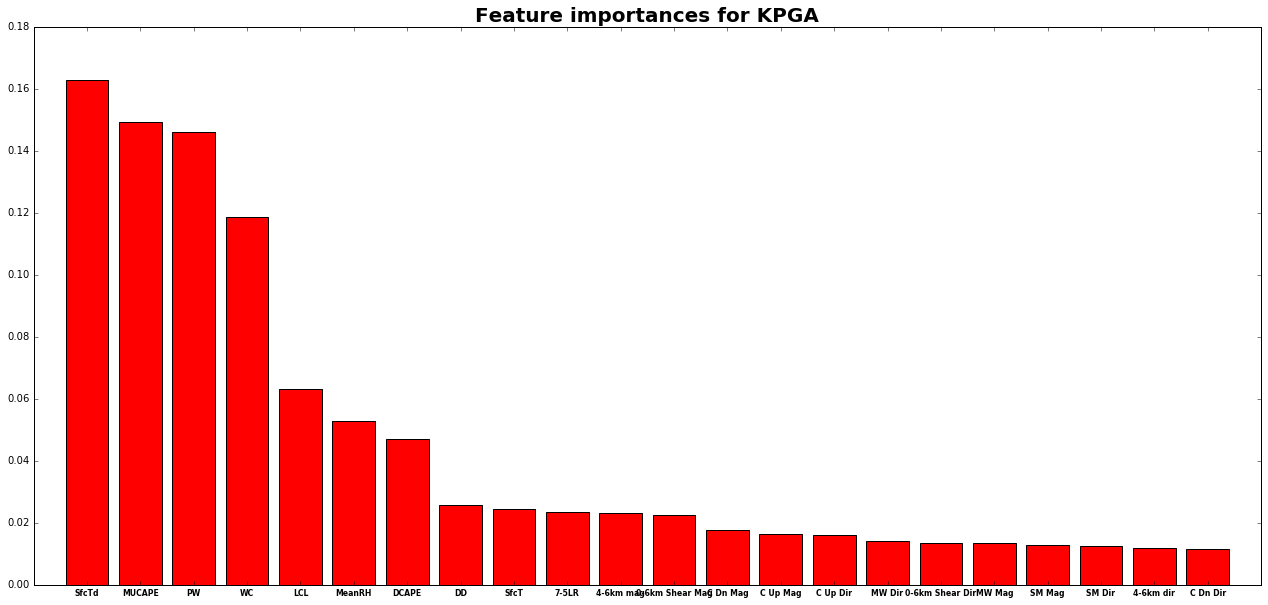

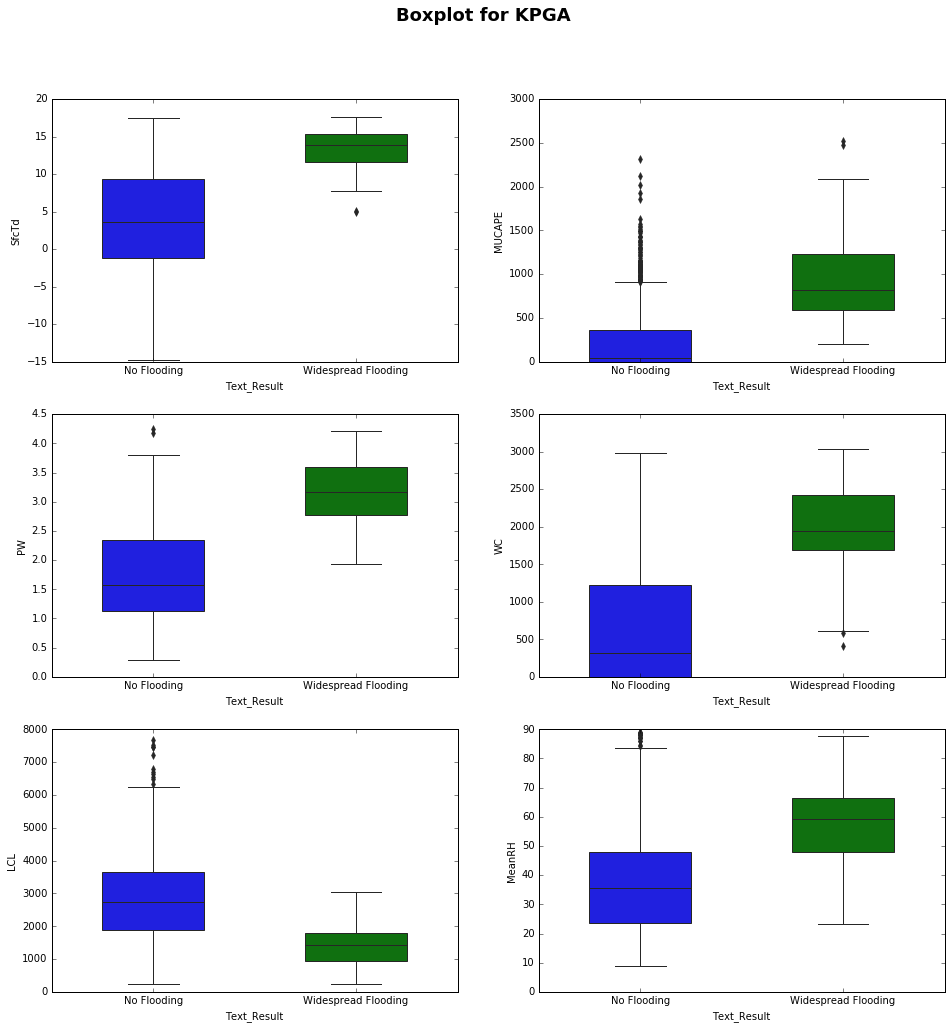

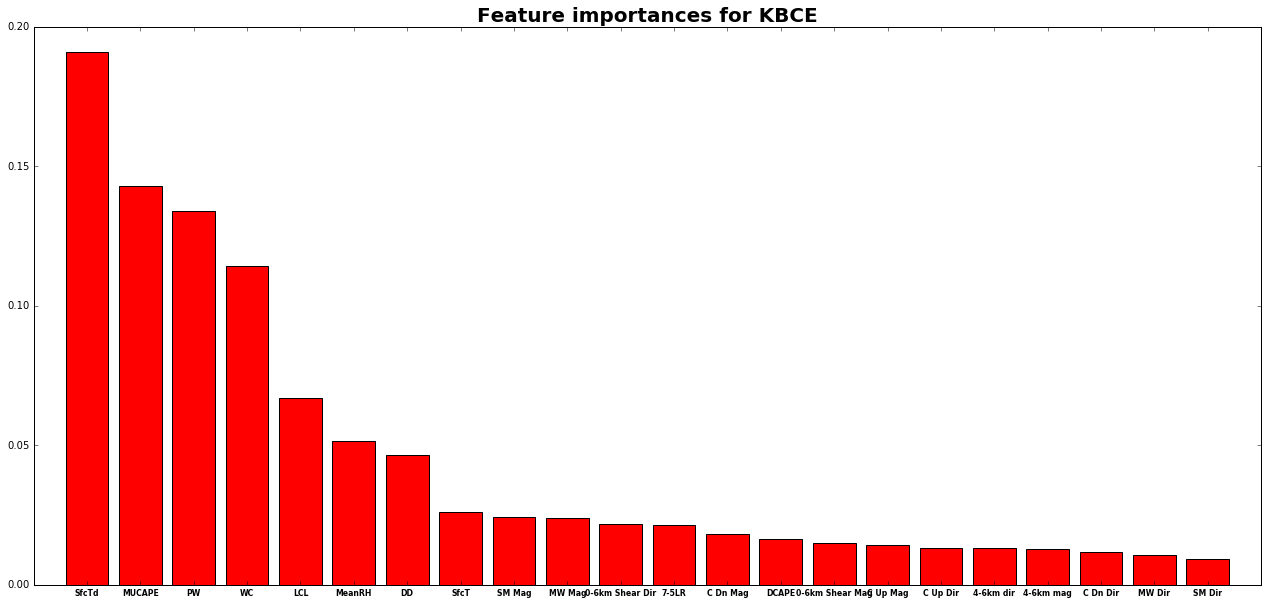

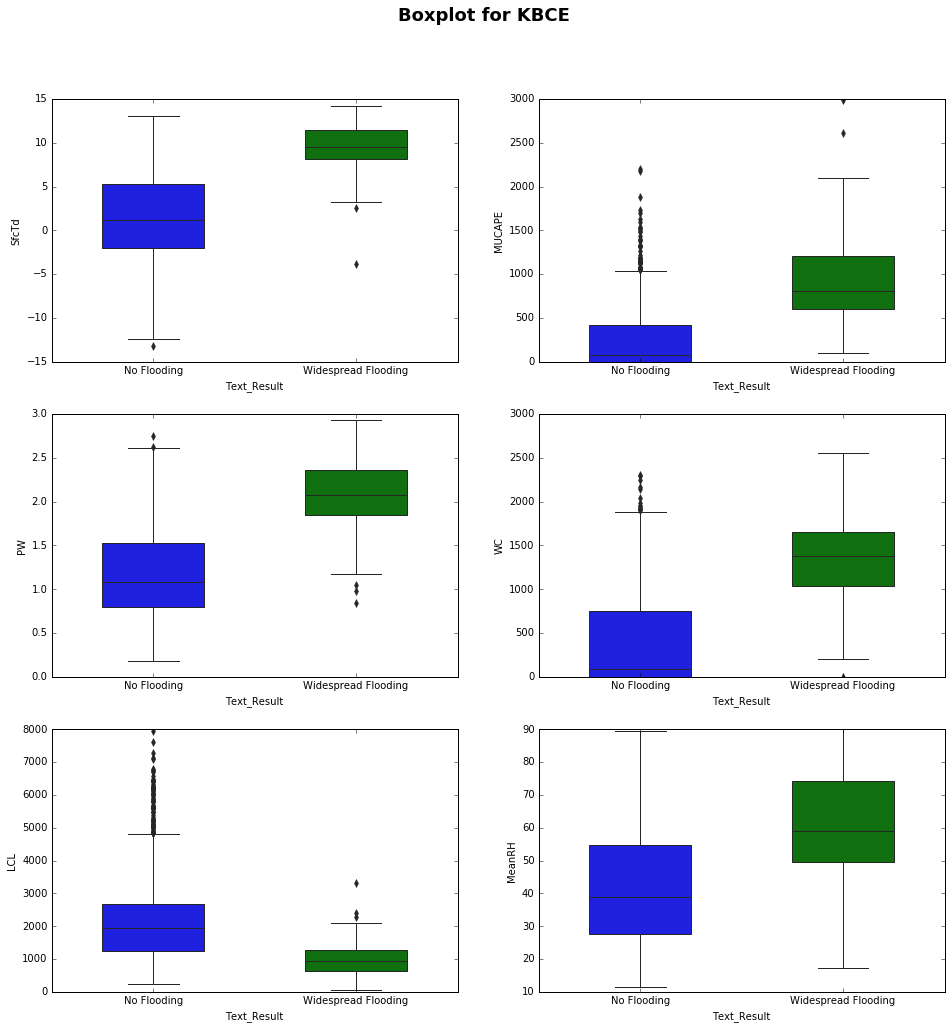

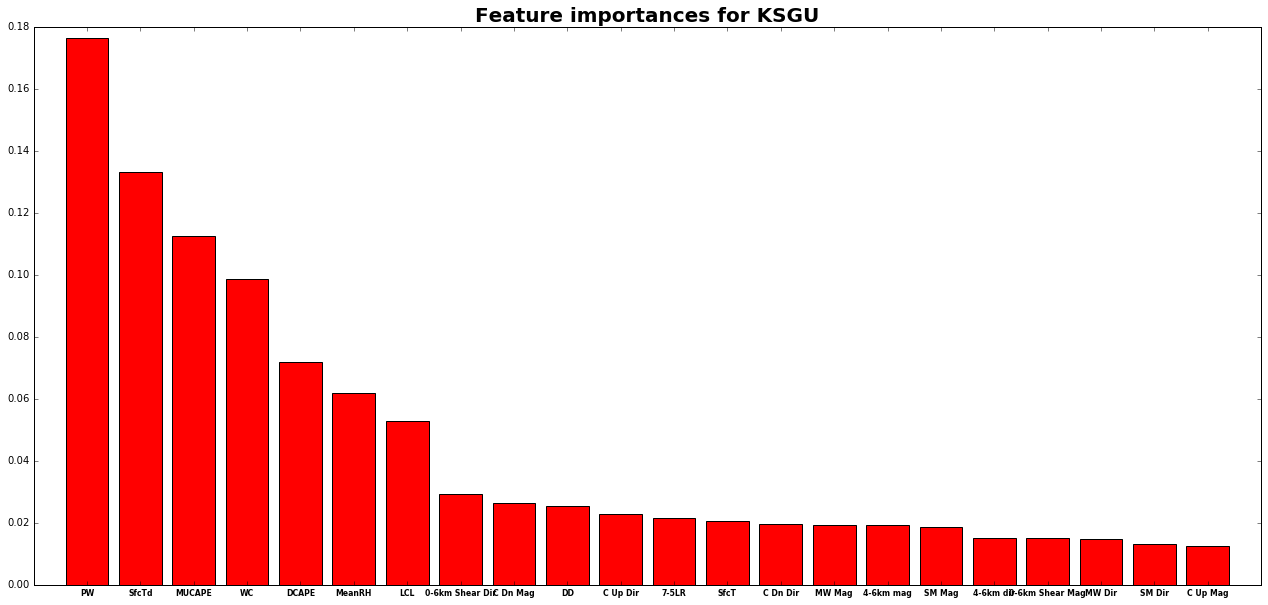

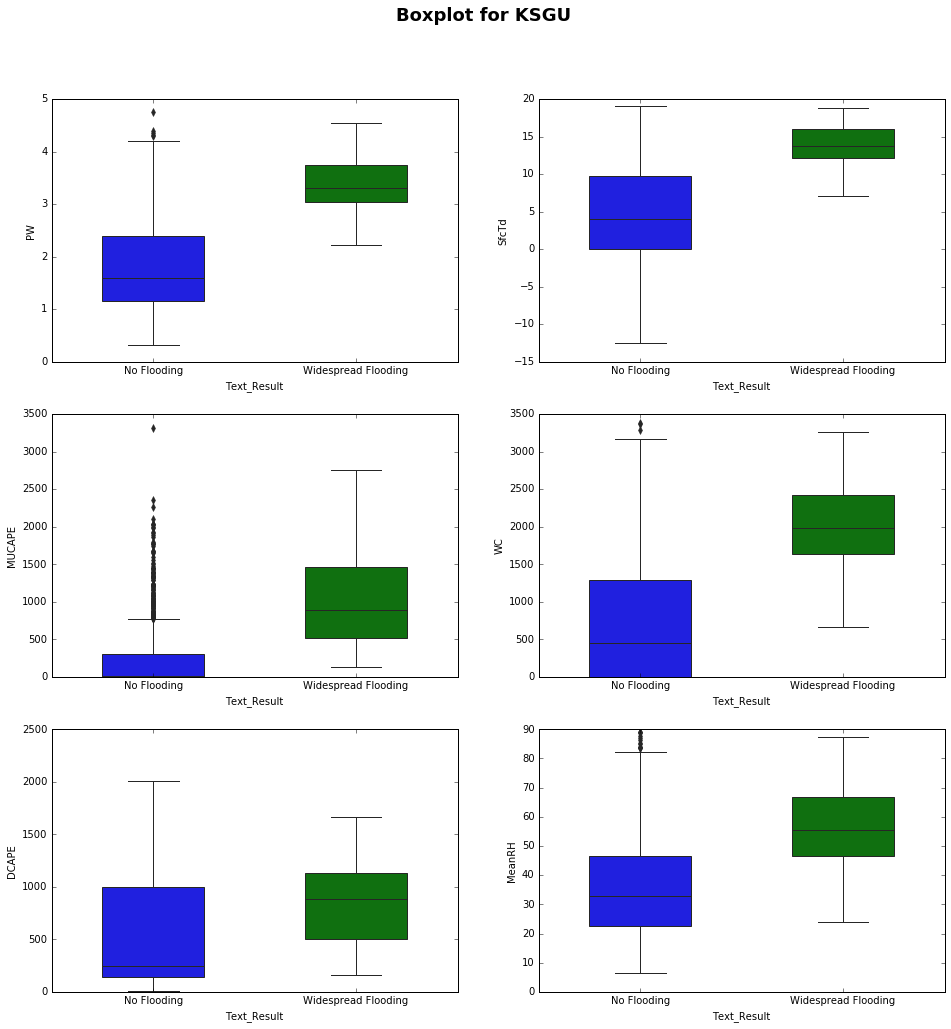

In [8]:
THERMO = ['MUCAPE', 'DCAPE', '7-5LR', 'LCL','PW', 'MeanRH','DD', 'WC', 'SfcTd', 'SfcT'] 

KIN = ['0-6km Shear Dir', '0-6km Shear Mag', 'C Dn Dir',
       'C Dn Mag', 'C Up Dir', 'C Up Mag', 'SM Dir','SM Mag',
       'MW Dir','MW Mag', '4-6km dir',
       '4-6km mag']

for csv in glob.glob('*nam.csv'):
    site_name = csv[:4]
    df = pd.read_csv(csv)
    df[df['Year'] >= 2014]
    if site_name == 'KBCE': # 3 Basins too stringent
        df.loc[(df['Basins'] == 2), 'Result'] = 1
    if '4HV' or 'SGU' in site_name: #Just not enough days with 2 Basins
        df.loc[(df['Basins'] == 1), 'Result'] = 1
    df.dropna(subset=KIN + THERMO + ['Result'], inplace=True) 
    predictors = df[THERMO + KIN]

    result = df['Result']
    
    xtrain, xtest, ytrain, ytest = train_test_split(predictors, 
                                                    result, 
                                                    test_size= 0.30) 
    #xtest['random'] = np.random.random(size=len(xtest))
    #xtrain['random'] = np.random.random(size=len(xtrain))
    #Hyperparameters based on tuning
    clf = ens.RandomForestClassifier(n_estimators=2000, max_depth=15, min_samples_leaf=4,
                                     min_samples_split=4,oob_score=True,
                                     class_weight='balanced')
    clf.fit(xtrain, ytrain)
    filename='NAM_model{}'.format(site_name)

    pickle.dump(clf, open(filename, 'wb'))

    y_pred = clf.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)
    internal_score = 1 - clf.oob_score_
    yprob = clf.predict_proba(xtest)[0:, 1]
    brier_score = metrics.brier_score_loss(ytest, yprob)
    auc = metrics.roc_auc_score(ytest, yprob)
    feature_imp = pd.Series(clf.feature_importances_,
                            index=xtest.columns).sort_values(ascending=False)
    #feature_imp = permutation_importances(clf, xtrain, ytrain, oob_classifier_accuracy)
    cm = metrics.confusion_matrix(ytest, y_pred)
    index_names = ['No Flooding Observed', 'Flooding Observed']
    col_names = ['No Flooding Forecast', 'Flooding Forecast']
    cm_df = pd.DataFrame(cm, columns =col_names, index=index_names)
    ck = kappa(ytest, y_pred)
    print (site_name, 'Accuracy = {:3.2f}, '.format(accuracy) + 
           ' Brier Score {:3.2f}, '.format(brier_score) + 
           'Out of bag error score {:3.2f}, '.format(internal_score) +
           'AUC = {:3.2f}, '.format(auc) +  
           'Cohen\'s Kappa {:3.2f}'.format(ck))
    display(cm_df.head())
    importance_plot(xtest, feature_imp, site_name)
    boxplot(df, feature_imp, site_name)
    print '-' * 45 + '\n'
    flood = np.round(clf.predict_proba(xtest[:]), 2) 
    prob_df = pd.DataFrame(flood, columns=['Prob_No_Flood', 'Prob_Flood'])
    result_df = ytest.reset_index()
    prob_df['Flood?'] = result_df['Result']
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) & 
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] == 0.5), 'Model_Prediction'] = 'Tie'
    
    print 'These are the probablities for the predictions the model got incorrect'
    display(prob_df[prob_df['Model_Prediction'] == 'Incorrect'])
    print '-' * 45 + '\n'

### What if we apply the extremes methodology to the RAP (although only looking at 18-03Z instead of 15-03Z

('KPGA', "Accuracy = 0.92,  Brier Score 0.05, Out of bag error score 0.10, AUC = 0.93, Cohen's Kappa 0.46")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,385,21
Flooding Observed,13,17


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
1,0.48,0.52,0.0,Incorrect
5,0.89,0.11,1.0,Incorrect
15,0.69,0.31,1.0,Incorrect
17,0.46,0.54,0.0,Incorrect
22,0.46,0.54,0.0,Incorrect
29,0.81,0.19,1.0,Incorrect
41,0.35,0.65,0.0,Incorrect
74,0.36,0.64,0.0,Incorrect
128,0.43,0.57,0.0,Incorrect
132,0.44,0.56,0.0,Incorrect


---------------------------------------------

('KSGU', "Accuracy = 0.92,  Brier Score 0.05, Out of bag error score 0.07, AUC = 0.94, Cohen's Kappa 0.38")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,387,14
Flooding Observed,22,13


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
5,0.63,0.37,1.0,Incorrect
10,0.62,0.38,1.0,Incorrect
15,0.26,0.74,0.0,Incorrect
27,0.52,0.48,1.0,Incorrect
30,0.59,0.41,1.0,Incorrect
43,0.53,0.47,1.0,Incorrect
47,0.40,0.60,0.0,Incorrect
93,0.69,0.31,1.0,Incorrect
100,0.70,0.30,1.0,Incorrect
115,0.44,0.56,0.0,Incorrect


---------------------------------------------

('KBCE', "Accuracy = 0.89,  Brier Score 0.08, Out of bag error score 0.14, AUC = 0.92, Cohen's Kappa 0.58")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,333,26
Flooding Observed,18,39


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
12,0.46,0.54,0.0,Incorrect
22,0.46,0.54,0.0,Incorrect
27,0.58,0.42,1.0,Incorrect
36,0.82,0.18,1.0,Incorrect
47,0.60,0.40,1.0,Incorrect
48,0.65,0.35,1.0,Incorrect
52,0.99,0.01,1.0,Incorrect
54,0.69,0.31,1.0,Incorrect
56,0.52,0.48,1.0,Incorrect
60,0.48,0.52,0.0,Incorrect


---------------------------------------------

('4HV_', "Accuracy = 0.94,  Brier Score 0.05, Out of bag error score 0.08, AUC = 0.93, Cohen's Kappa 0.39")


,No Flooding Forecast,Flooding Forecast
No Flooding Observed,403,11
Flooding Observed,14,9


---------------------------------------------

These are the probablities for the predictions the model got incorrect


,Prob_No_Flood,Prob_Flood,Flood?,Model_Prediction
21,0.81,0.19,1.0,Incorrect
22,0.47,0.53,0.0,Incorrect
42,0.47,0.53,0.0,Incorrect
53,0.36,0.64,0.0,Incorrect
59,0.82,0.18,1.0,Incorrect
60,0.44,0.56,0.0,Incorrect
69,0.65,0.35,1.0,Incorrect
79,0.32,0.68,0.0,Incorrect
83,0.35,0.65,0.0,Incorrect
96,0.88,0.12,1.0,Incorrect


---------------------------------------------



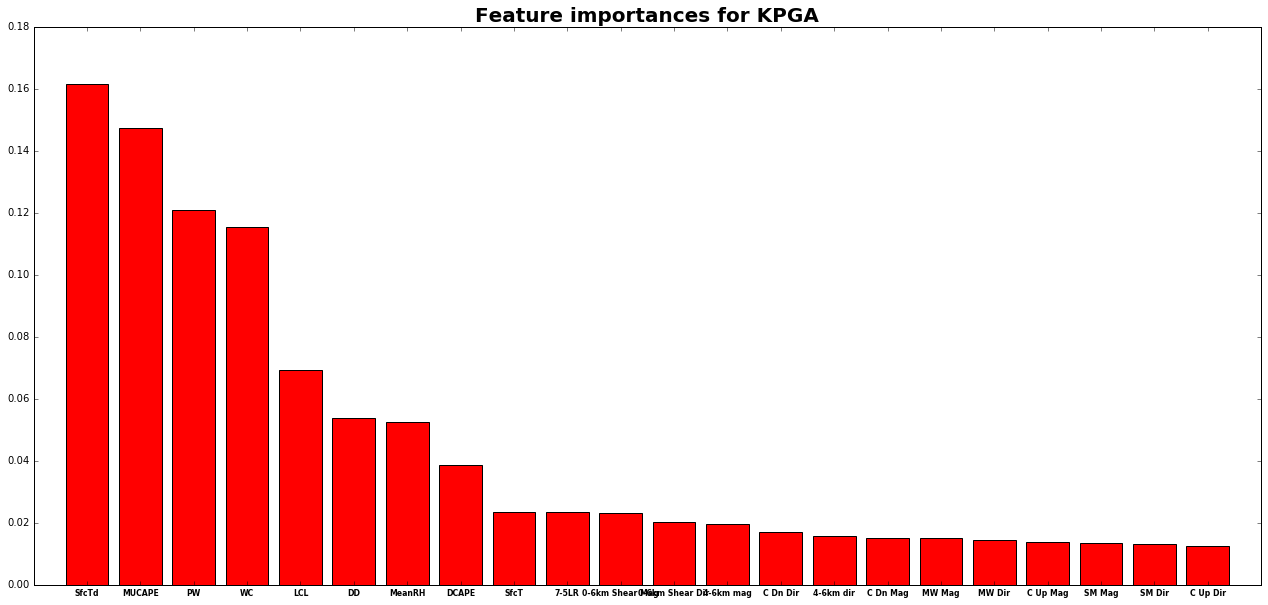

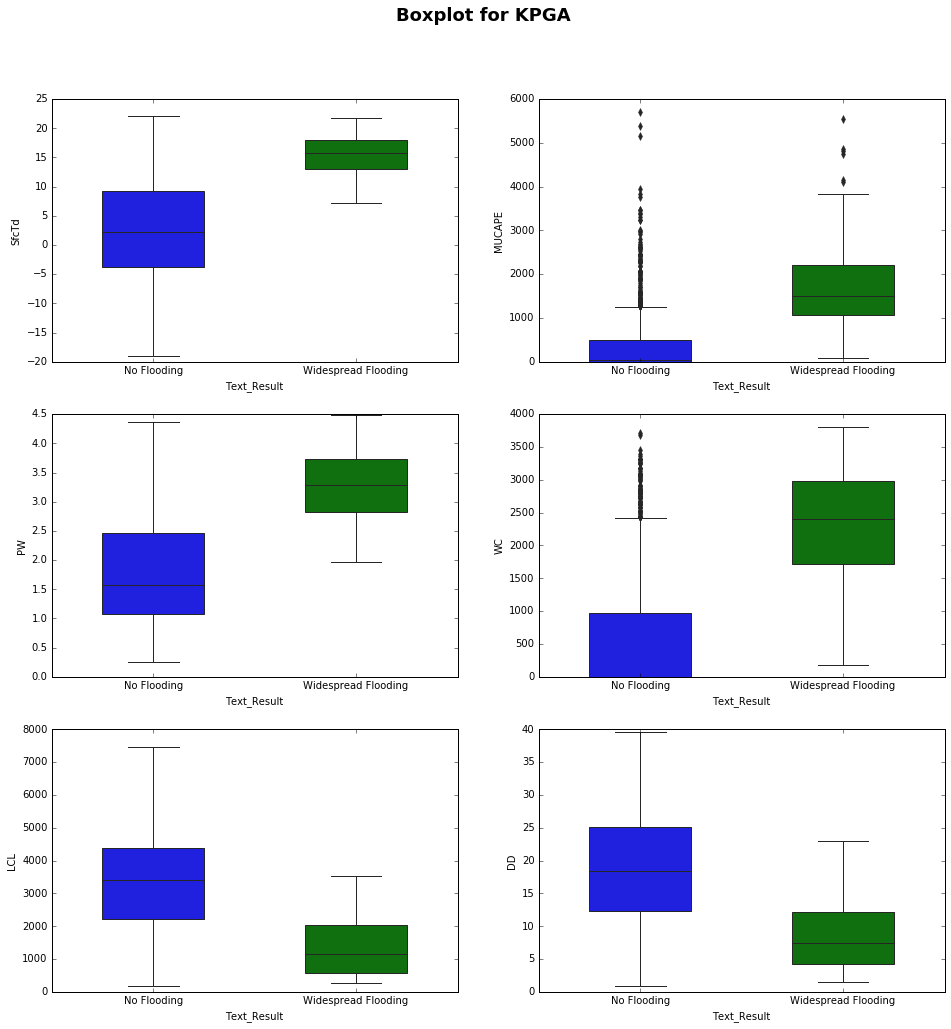

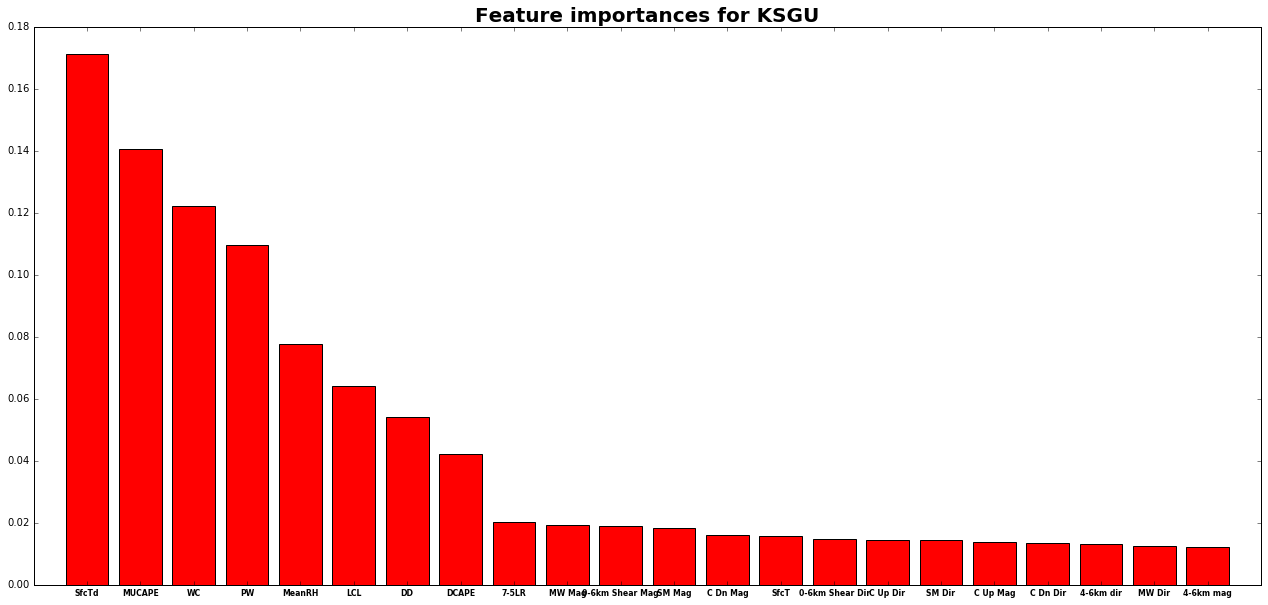

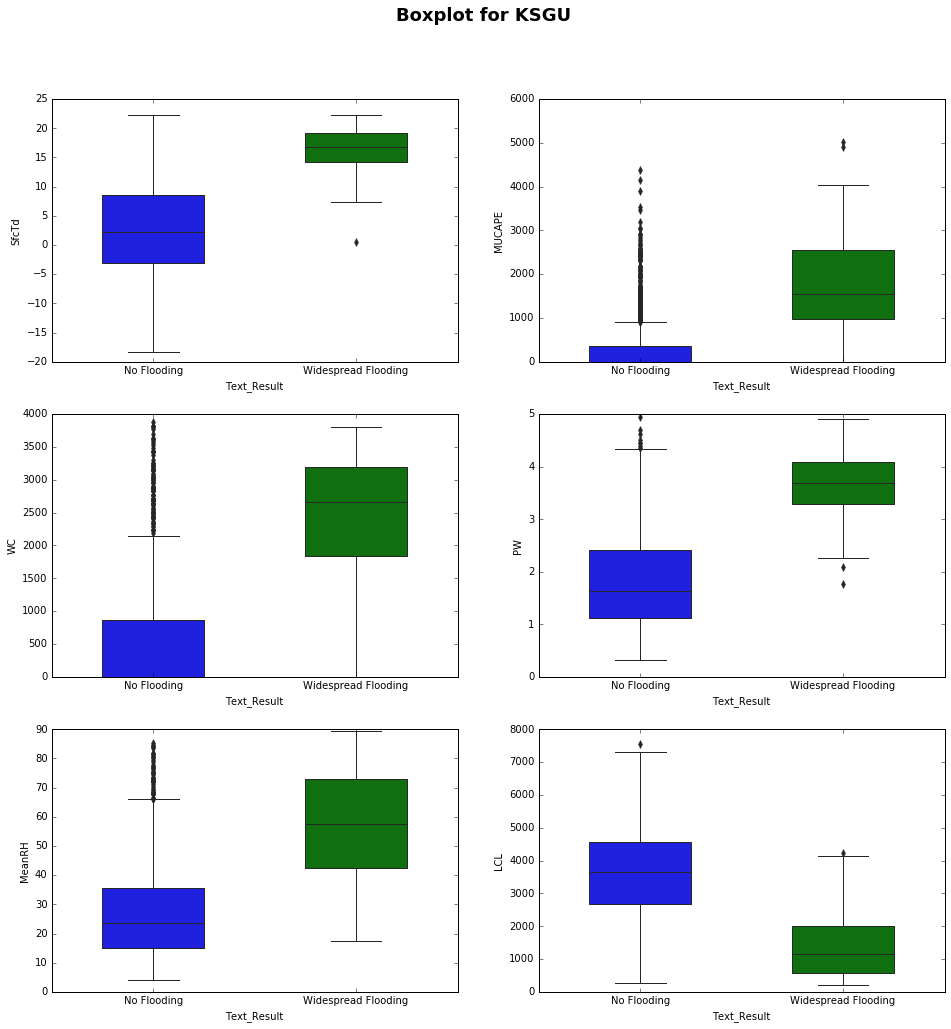

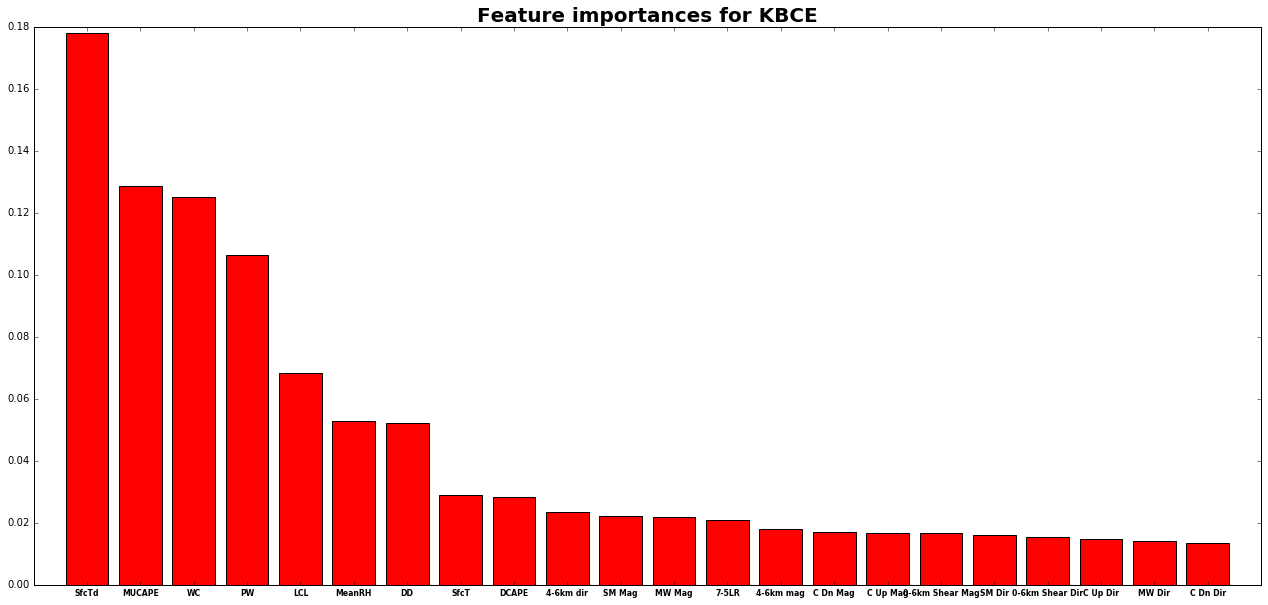

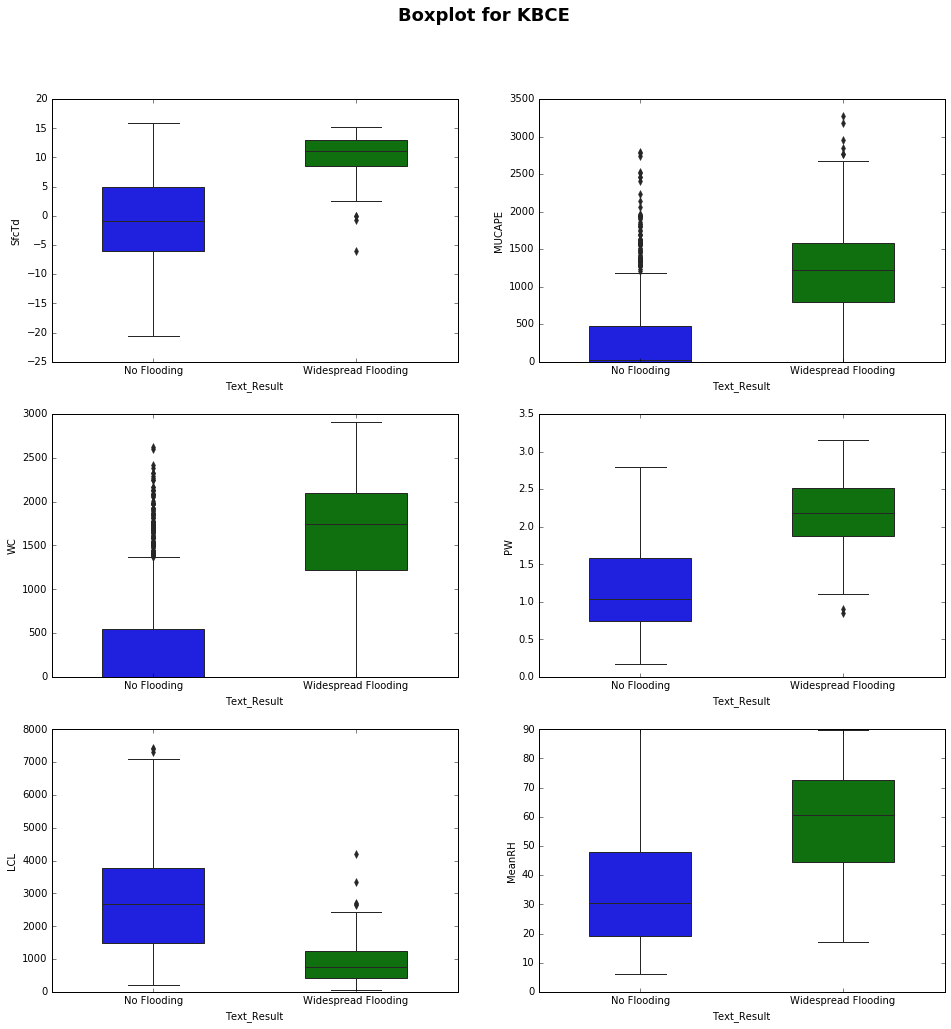

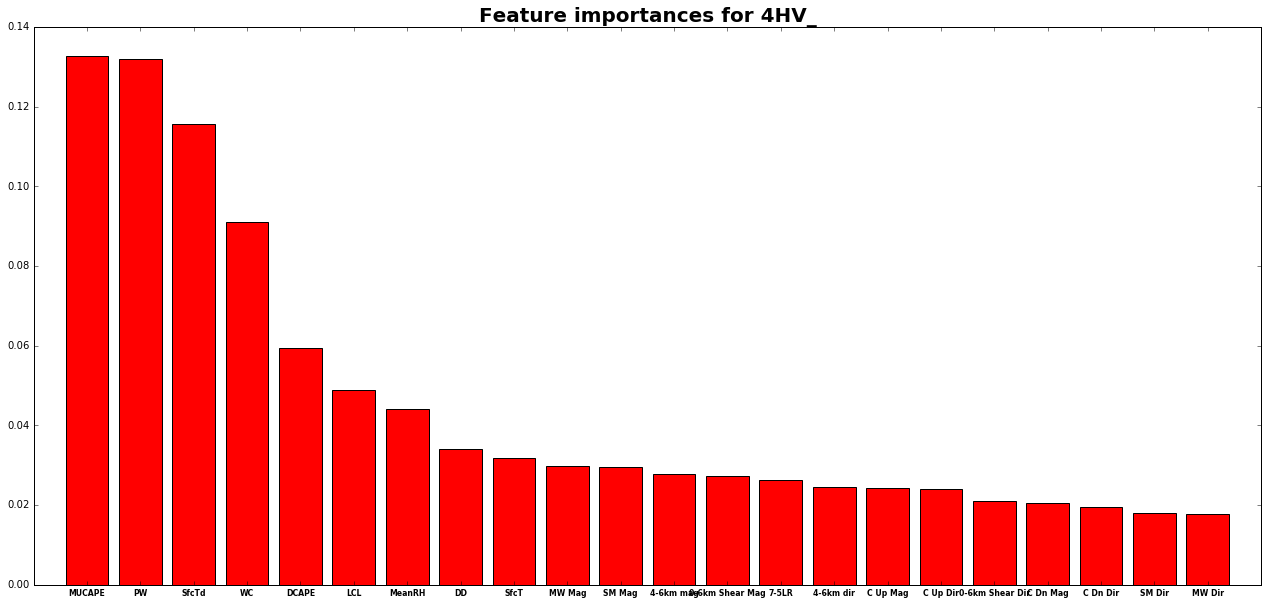

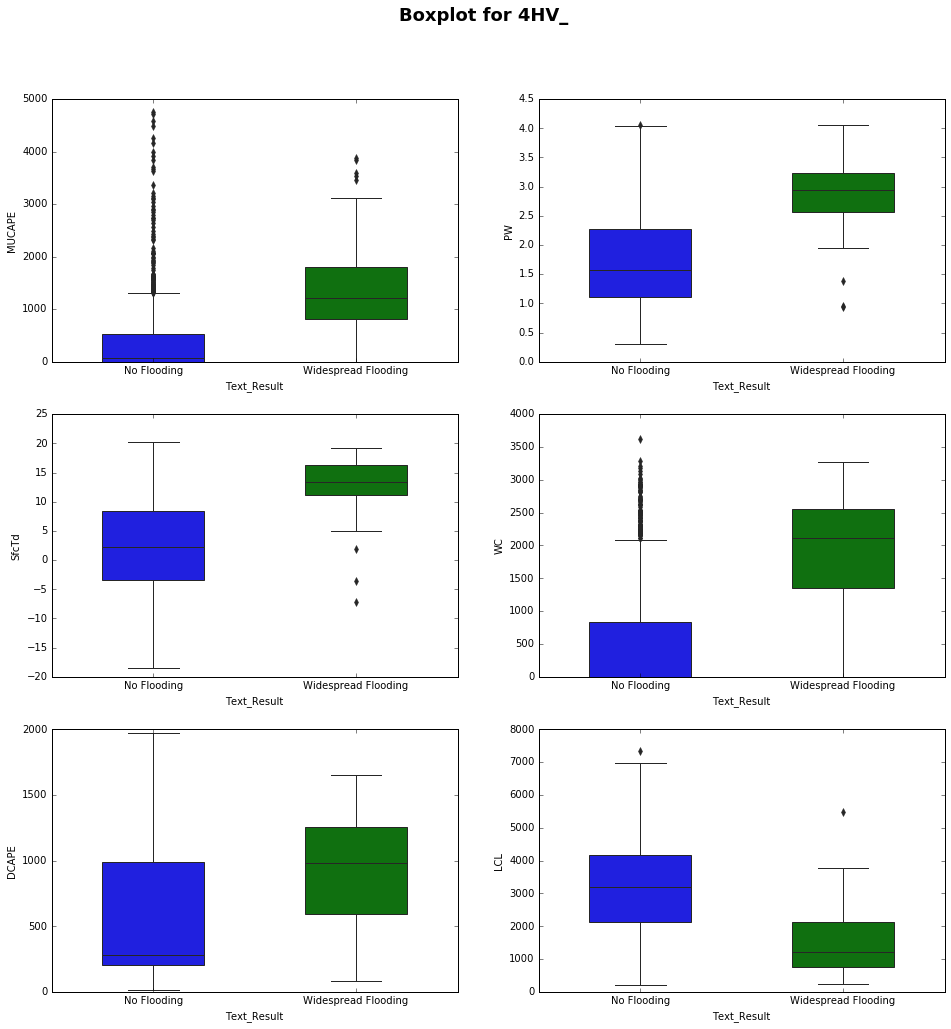

In [7]:
THERMO = ['MUCAPE', 'DCAPE', '7-5LR', 'LCL','PW', 'MeanRH','DD', 'WC', 'SfcTd', 'SfcT'] 

KIN = ['0-6km Shear Dir', '0-6km Shear Mag', 'C Dn Dir',
       'C Dn Mag', 'C Up Dir', 'C Up Mag', 'SM Dir','SM Mag',
       'MW Dir','MW Mag', '4-6km dir',
       '4-6km mag']

for csv in glob.glob('*rap.csv'):
    site_name = csv[:4]
    df = pd.read_csv(csv)
    df[df['Year'] >= 2014]
    if site_name == 'KBCE': # 3 Basins too stringent
        df.loc[(df['Basins'] == 2), 'Result'] = 1
    if '4HV' or 'SGU' in site_name: #Just not enough days with 2 Basins
        df.loc[(df['Basins'] == 1), 'Result'] = 1
    df.dropna(subset=KIN + THERMO + ['Result'], inplace=True) 
    predictors = df[THERMO + KIN]

    result = df['Result']
    
    xtrain, xtest, ytrain, ytest = train_test_split(predictors, 
                                                    result, 
                                                    test_size= 0.30) 
    #xtest['random'] = np.random.random(size=len(xtest))
    #xtrain['random'] = np.random.random(size=len(xtrain))
    #Hyperparameters based on tuning
    clf = ens.RandomForestClassifier(n_estimators=2000, max_depth=15, min_samples_leaf=4,
                                     min_samples_split=4,oob_score=True,
                                     class_weight='balanced')
    clf.fit(xtrain, ytrain)
    filename='RAP_model{}'.format(site_name)

    pickle.dump(clf, open(filename, 'wb'))

    y_pred = clf.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)
    internal_score = 1 - clf.oob_score_
    yprob = clf.predict_proba(xtest)[0:, 1]
    brier_score = metrics.brier_score_loss(ytest, yprob)
    auc = metrics.roc_auc_score(ytest, yprob)
    feature_imp = pd.Series(clf.feature_importances_,
                            index=xtest.columns).sort_values(ascending=False)
    #feature_imp = permutation_importances(clf, xtrain, ytrain, oob_classifier_accuracy)
    cm = metrics.confusion_matrix(ytest, y_pred)
    index_names = ['No Flooding Observed', 'Flooding Observed']
    col_names = ['No Flooding Forecast', 'Flooding Forecast']
    cm_df = pd.DataFrame(cm, columns =col_names, index=index_names)
    ck = kappa(ytest, y_pred)
    print (site_name, 'Accuracy = {:3.2f}, '.format(accuracy) + 
           ' Brier Score {:3.2f}, '.format(brier_score) + 
           'Out of bag error score {:3.2f}, '.format(internal_score) +
           'AUC = {:3.2f}, '.format(auc) +  
           'Cohen\'s Kappa {:3.2f}'.format(ck))
    display(cm_df.head())
    importance_plot(xtest, feature_imp, site_name)
    boxplot(df, feature_imp, site_name)
    print '-' * 45 + '\n'
    flood = np.round(clf.predict_proba(xtest[:]), 2) 
    prob_df = pd.DataFrame(flood, columns=['Prob_No_Flood', 'Prob_Flood'])
    result_df = ytest.reset_index()
    prob_df['Flood?'] = result_df['Result']
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) & 
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Incorrect'
    prob_df.loc[(prob_df['Prob_No_Flood'] > 0.5) &
                (prob_df['Flood?'] == 0), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] > 0.5) &
                (prob_df['Flood?'] == 1), 'Model_Prediction'] = 'Correct'
    prob_df.loc[(prob_df['Prob_Flood'] == 0.5), 'Model_Prediction'] = 'Tie'
    
    print 'These are the probablities for the predictions the model got incorrect'
    display(prob_df[prob_df['Model_Prediction'] == 'Incorrect'])
    print '-' * 45 + '\n'